In [1]:
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import plotly.express as px


In [2]:
renewable_share_energy = pd.read_csv('DATAS/01 renewable-share-energy.csv')
modern_renewable_consumption = pd.read_csv('DATAS/02 modern-renewable-energy-consumption.csv')
modern_renewable_production = pd.read_csv('DATAS/03 modern-renewable-prod.csv')
share_electricity_renewables = pd.read_csv('DATAS/04 share-electricity-renewables.csv')
hydropower_consumption = pd.read_csv('DATAS/05 hydropower-consumption.csv')
hydro_share_energy = pd.read_csv('DATAS/06 hydro-share-energy.csv')
share_electricity_hydro = pd.read_csv('DATAS/07 share-electricity-hydro.csv')
wind_generation = pd.read_csv('DATAS/08 wind-generation.csv')
cumulative_installed_wind_capacity = pd.read_csv('DATAS/09 cumulative-installed-wind-energy-capacity-gigawatts.csv')
wind_share_energy = pd.read_csv('DATAS/10 wind-share-energy.csv')
share_electricity_wind = pd.read_csv('DATAS/11 share-electricity-wind.csv')
solar_energy_consumption = pd.read_csv('DATAS/12 solar-energy-consumption.csv')
installed_solar_PV_capacity = pd.read_csv('DATAS/13 installed-solar-PV-capacity.csv')
solar_share_energy = pd.read_csv('DATAS/14 solar-share-energy.csv')
share_electricity_solar = pd.read_csv('DATAS/15 share-electricity-solar.csv')
biofuel_production = pd.read_csv('DATAS/16 biofuel-production.csv')

Renewable Energy Share and consumption Over Time


In [3]:
sns.set(style="whitegrid")


In [4]:
renewable_share_energy.rename(columns={'Renewables (% equivalent primary energy)': 'Renewables_percent'}, inplace=True)

print(renewable_share_energy.isnull().sum())
renewable_share_energy = renewable_share_energy.dropna()

Entity                   0
Code                  1311
Year                     0
Renewables_percent       0
dtype: int64


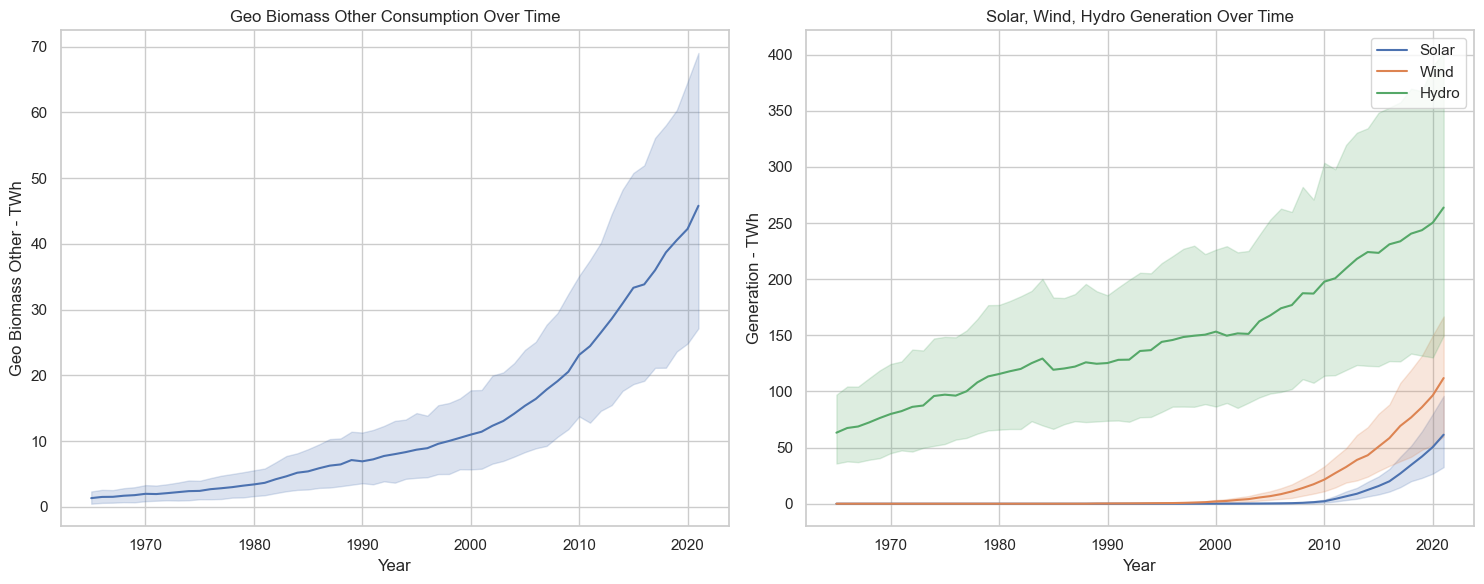

In [5]:
# Visualize renewable energy share and consumption over time
fig, axes = plt.subplots(nrows=1, ncols=2, figsize=(15, 6))


# First graph: Geo Biomass Other vs. Year
sns.lineplot(x='Year', y='Geo Biomass Other - TWh', data=modern_renewable_consumption, ax=axes[0])
axes[0].set_title('Geo Biomass Other Consumption Over Time')
axes[0].set_xlabel('Year')
axes[0].set_ylabel('Geo Biomass Other - TWh')

# Second graph: Solar, Wind, Hydro Generation vs. Year
sns.lineplot(x='Year', y='Solar Generation - TWh', data=modern_renewable_consumption, label='Solar', ax=axes[1])
sns.lineplot(x='Year', y='Wind Generation - TWh', data=modern_renewable_consumption, label='Wind', ax=axes[1])
sns.lineplot(x='Year', y='Hydro Generation - TWh', data=modern_renewable_consumption, label='Hydro', ax=axes[1])
axes[1].set_title('Solar, Wind, Hydro Generation Over Time')
axes[1].set_xlabel('Year')
axes[1].set_ylabel('Generation - TWh')
axes[1].legend()

plt.tight_layout()  # Adjust spacing between subplots
plt.show()

This code snippet uses the Seaborn library to create a line plot that visualizes the change in renewable energy share over time. The x-axis represents the years, while the y-axis represents the percentage of renewables in the total primary energy. The result is a line plot that shows how the renewable energy share has evolved over the years.



Renewable Energy Share by Entity (Bar Plot):


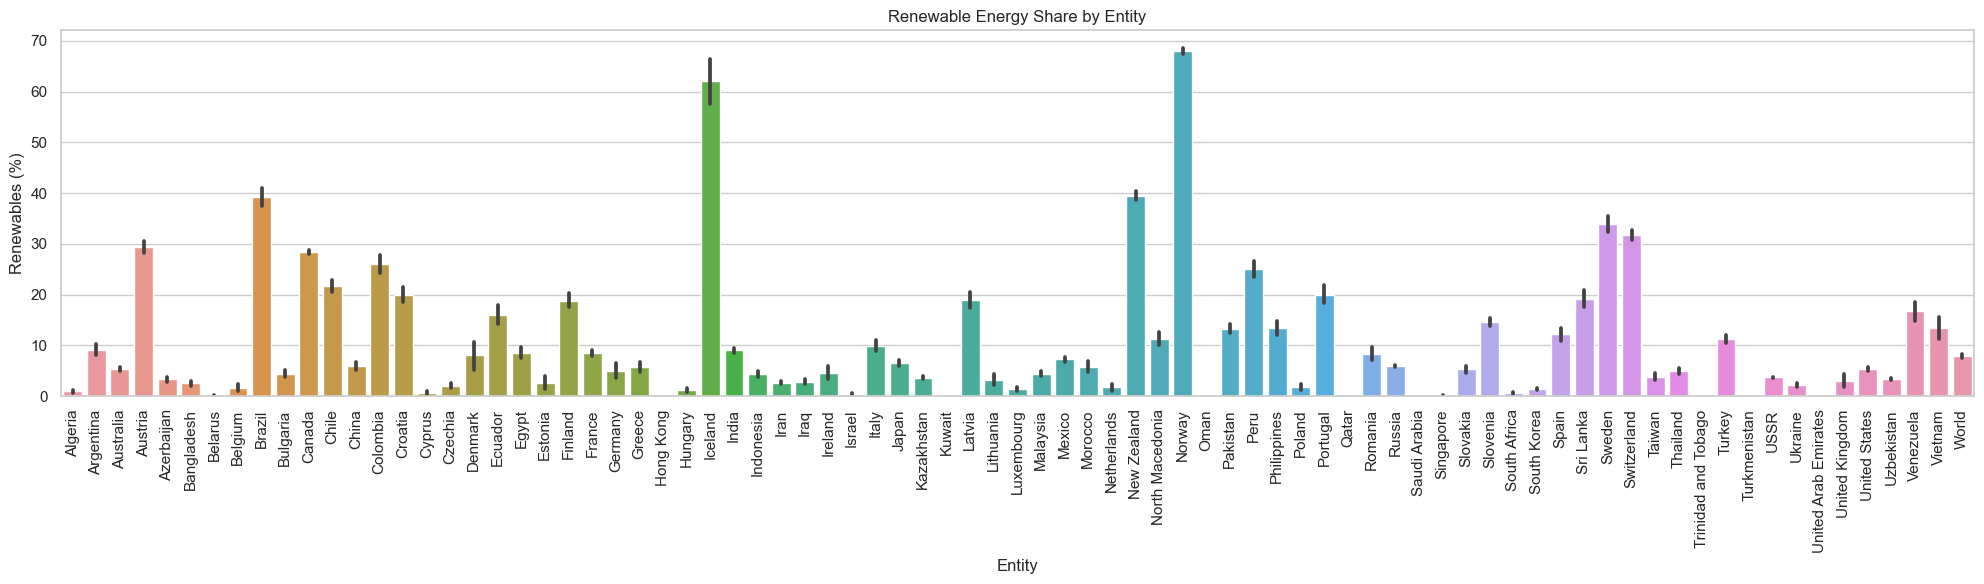

In [6]:
plt.figure(figsize=(20, 6))
sns.barplot(x='Entity', y='Renewables_percent', data=renewable_share_energy)
plt.title('Renewable Energy Share by Entity')
plt.xlabel('Entity')
plt.ylabel('Renewables (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In this code, a bar plot is generated to display the distribution of renewable energy share among different entities. Each bar represents an entity, and the height of the bar corresponds to the percentage of renewables in the total primary energy for that entity.


Renewable Energy Share Over Time (Box Plot):


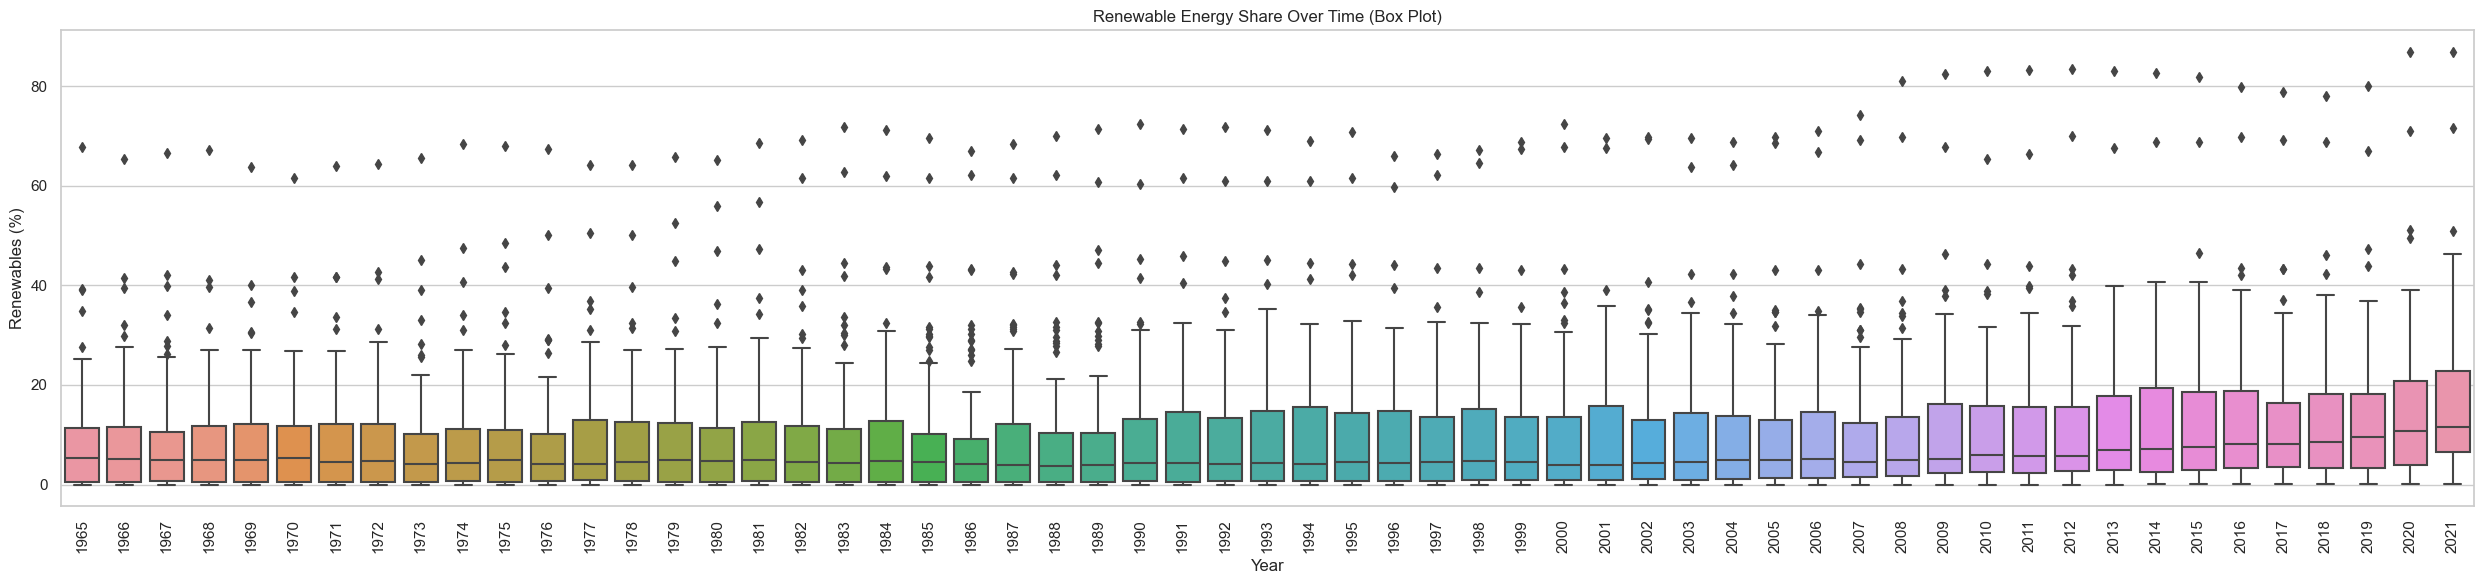

In [7]:
plt.figure(figsize=(25, 6))
sns.boxplot(x='Year', y='Renewables_percent', data=renewable_share_energy)
plt.title('Renewable Energy Share Over Time (Box Plot)')
plt.xlabel('Year')
plt.ylabel('Renewables (%)')
plt.xticks(rotation=90)  # Rotate x-axis labels for better visibility
plt.tight_layout()
plt.show()

In [8]:
plt.figure(figsize=(12, 6))

<Figure size 1200x600 with 0 Axes>

<Figure size 1200x600 with 0 Axes>

In [9]:
energy_columns = ['Geo Biomass Other - TWh', 'Solar Generation - TWh', 'Wind Generation - TWh', 'Hydro Generation - TWh']
energy_labels = ['Geo Biomass Other', 'Solar Generation', 'Wind Generation', 'Hydro Generation']

In [10]:
print(modern_renewable_consumption.isnull().sum())
modern_renewable_consumption = modern_renewable_consumption.dropna()

Entity                        0
Code                       1311
Year                          0
Geo Biomass Other - TWh     144
Solar Generation - TWh      168
Wind Generation - TWh       165
Hydro Generation - TWh        7
dtype: int64


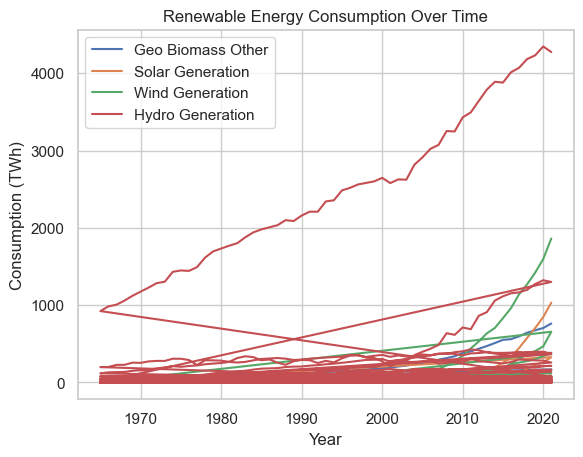

In [11]:
for column, label in zip(energy_columns, energy_labels):
    plt.plot(modern_renewable_consumption['Year'], modern_renewable_consumption[column], label=label)

plt.title('Renewable Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Consumption (TWh)')
plt.legend()
plt.show()

In [12]:
total_consumption = modern_renewable_consumption[energy_columns].sum()
total_consumption_percentage = total_consumption / total_consumption.sum() * 100


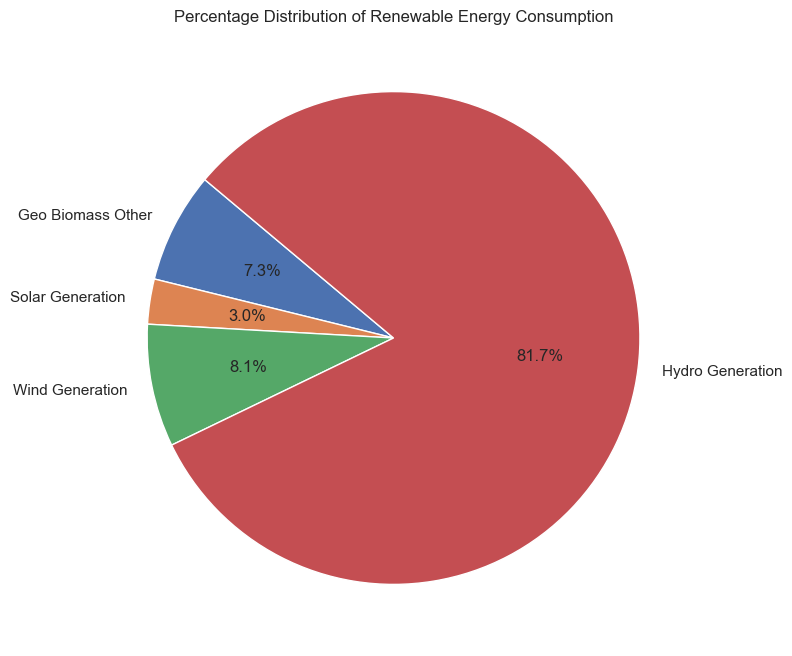

In [13]:
plt.figure(figsize=(20, 8))
plt.pie(total_consumption_percentage, labels=energy_labels, autopct='%1.1f%%', startangle=140)
plt.title('Percentage Distribution of Renewable Energy Consumption')
plt.show()

In [14]:
total_consumption = modern_renewable_consumption[energy_columns].sum(axis=1)


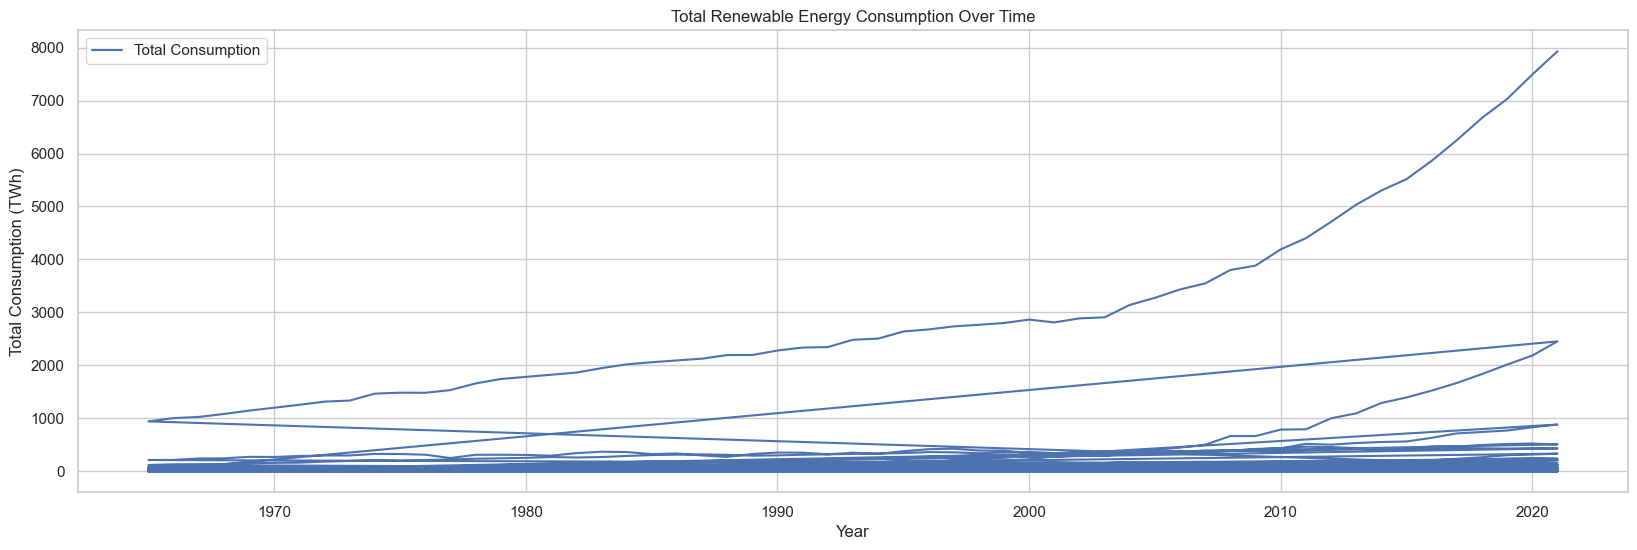

In [15]:
plt.figure(figsize=(20, 6))
plt.plot(modern_renewable_consumption['Year'], total_consumption, color='b', label='Total Consumption')
plt.title('Total Renewable Energy Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Total Consumption (TWh)')
plt.legend()
plt.show()

In [16]:
print(modern_renewable_production.isnull().sum())

modern_renewable_production = modern_renewable_production.dropna()  

Entity                                           0
Code                                          1555
Year                                             0
Electricity from wind (TWh)                    175
Electricity from hydro (TWh)                    11
Electricity from solar (TWh)                   168
Other renewables including bioenergy (TWh)     220
dtype: int64


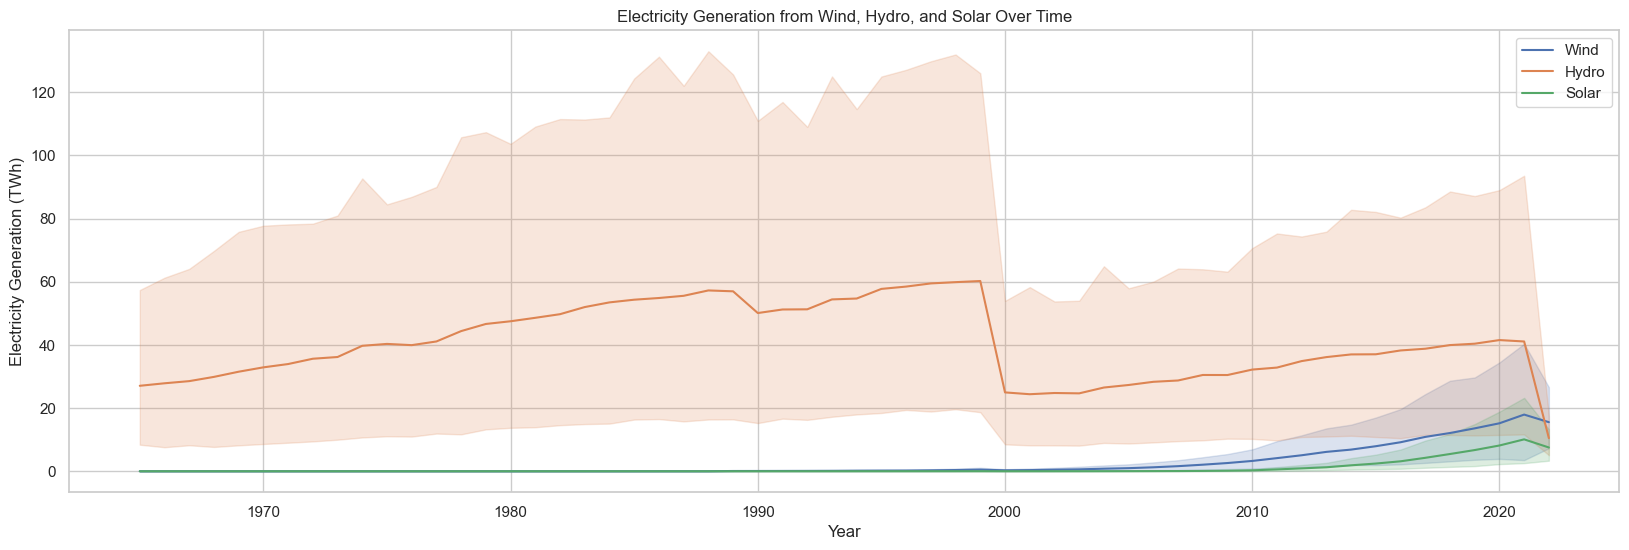

In [17]:
# Create a line plot for electricity generation from wind, hydro, and solar over the years
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year', y='Electricity from wind (TWh)', data=modern_renewable_production, label='Wind')
sns.lineplot(x='Year', y='Electricity from hydro (TWh)', data=modern_renewable_production, label='Hydro')
sns.lineplot(x='Year', y='Electricity from solar (TWh)', data=modern_renewable_production, label='Solar')
plt.title('Electricity Generation from Wind, Hydro, and Solar Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity Generation (TWh)')
plt.legend()
plt.show()


In [18]:
print(hydro_share_energy.isnull().sum())

hydro_share_energy = hydro_share_energy.dropna()  

Entity                                    0
Code                                   1311
Year                                      0
Hydro (% equivalent primary energy)       0
dtype: int64


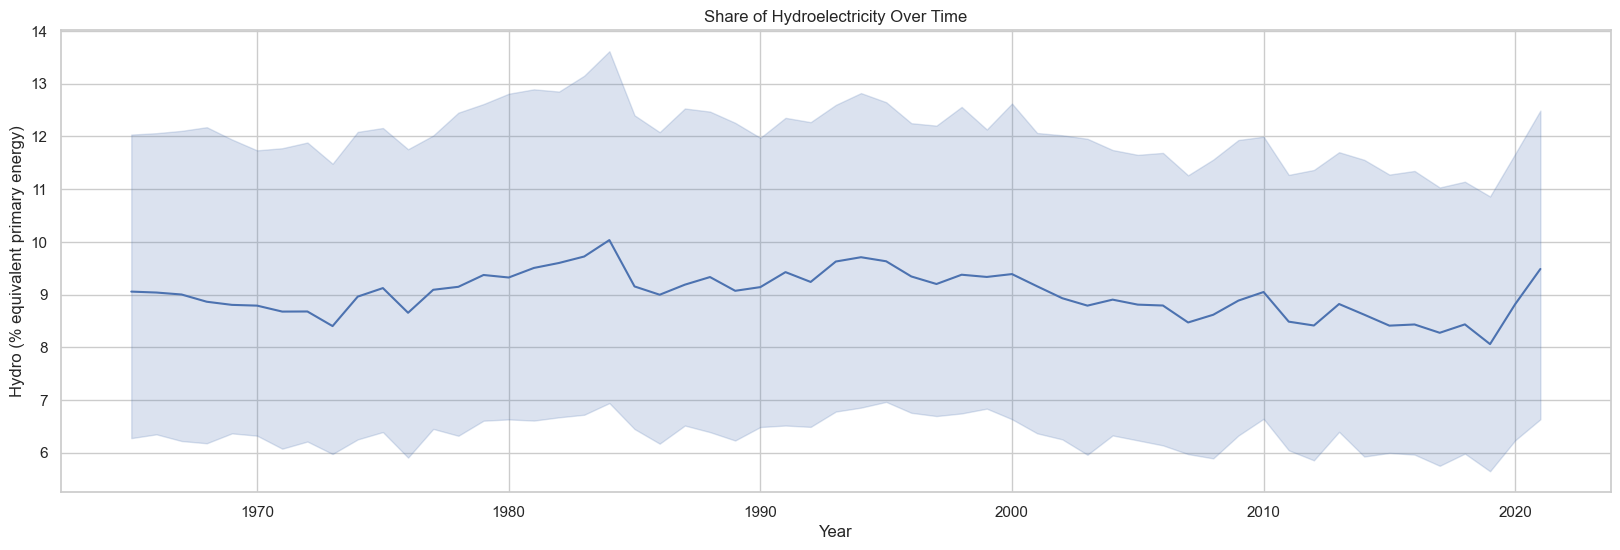

In [19]:
# Create a line plot for the share of hydroelectricity over the years
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year', y='Hydro (% equivalent primary energy)', data=hydro_share_energy)
plt.title('Share of Hydroelectricity Over Time')
plt.xlabel('Year')
plt.ylabel('Hydro (% equivalent primary energy)')
plt.show()


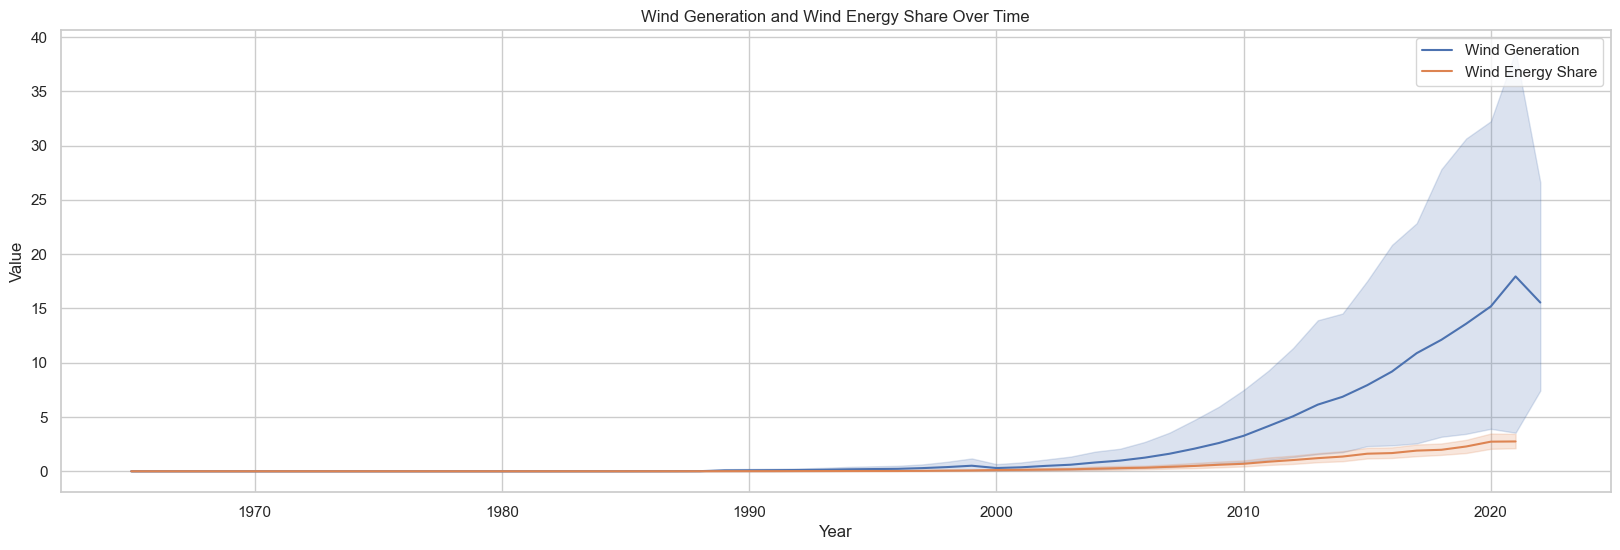

In [20]:
# Visualize wind generation and wind energy share over time
plt.figure(figsize=(20, 6))

# Line plot for Wind Generation
sns.lineplot(x='Year', y='Electricity from wind (TWh)', data=modern_renewable_production, label='Wind Generation')

# Line plot for Wind Energy Share
sns.lineplot(x='Year', y='Wind (% equivalent primary energy)', data=wind_share_energy, label='Wind Energy Share')

plt.title('Wind Generation and Wind Energy Share Over Time')
plt.xlabel('Year')
plt.ylabel('Value')
plt.legend()
plt.show()


Hydropower Tüketimi Zaman İçinde (Çizgi Grafiği):


In [21]:
print(hydropower_consumption.isnull().sum())

hydropower_consumption = hydropower_consumption.dropna()  

Entity                             0
Code                            1555
Year                               0
Electricity from hydro (TWh)       0
dtype: int64


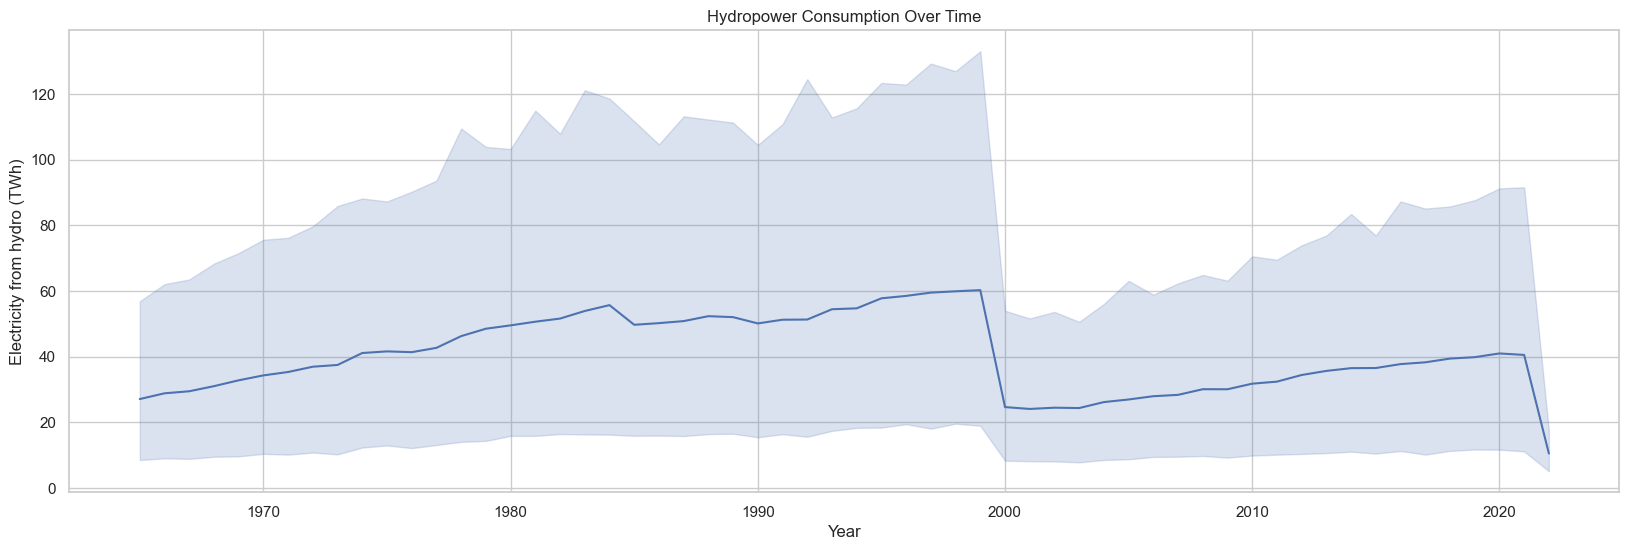

In [22]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year', y='Electricity from hydro (TWh)', data=hydropower_consumption)
plt.title('Hydropower Consumption Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity from hydro (TWh)')
plt.show()


En Yüksek Hydropower Tüketim Ülkeleri (Sıralı Çubuk Grafiği):


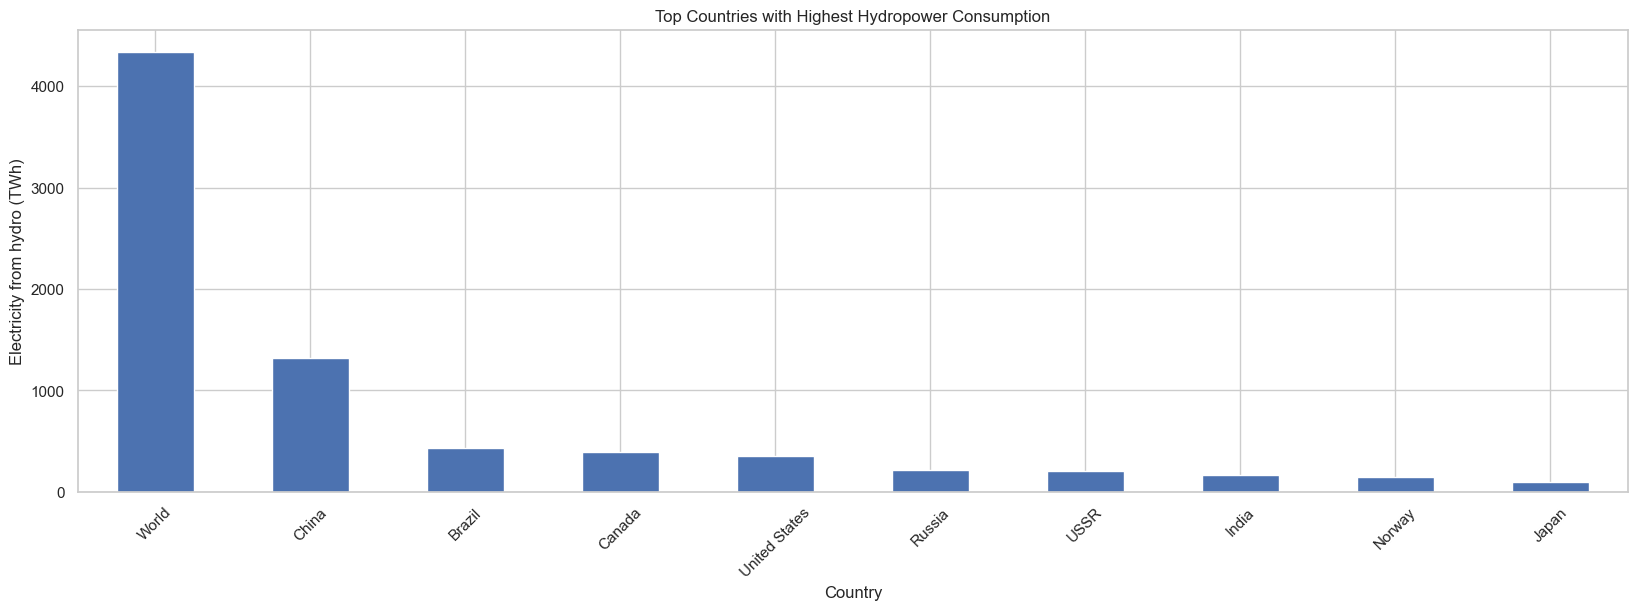

In [23]:
top_countries = hydropower_consumption.groupby('Entity')['Electricity from hydro (TWh)'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 6))
top_countries.plot(kind='bar')
plt.title('Top Countries with Highest Hydropower Consumption')
plt.xlabel('Country')
plt.ylabel('Electricity from hydro (TWh)')
plt.xticks(rotation=45)
plt.show()


Hydropower Tüketiminin Bölgesel Dağılımı (Pasta Grafiği):


In [24]:
country_share = hydropower_consumption.groupby('Entity')['Electricity from hydro (TWh)'].sum().reset_index()
country_share['Share'] = country_share['Electricity from hydro (TWh)'] / total_consumption * 100


In [25]:
# Interaktif pasta grafiğini oluşturun
fig = px.pie(
    data_frame=country_share,
    names='Entity',  # Ülke adları
    values='Share',  # Paylar
    title='Regional Distribution of Hydropower Consumption',
    labels={'Entity': 'Country', 'Share': 'Percentage'},
    hover_name='Entity'  # Fare üzerine geldiğinde gösterilecek metin
)

# Pasta grafiğini görüntüleyin
fig.show()

Hydropower Tüketiminin Yıllara Göre Dağılımı (Hızlı Çizgi Grafiği):


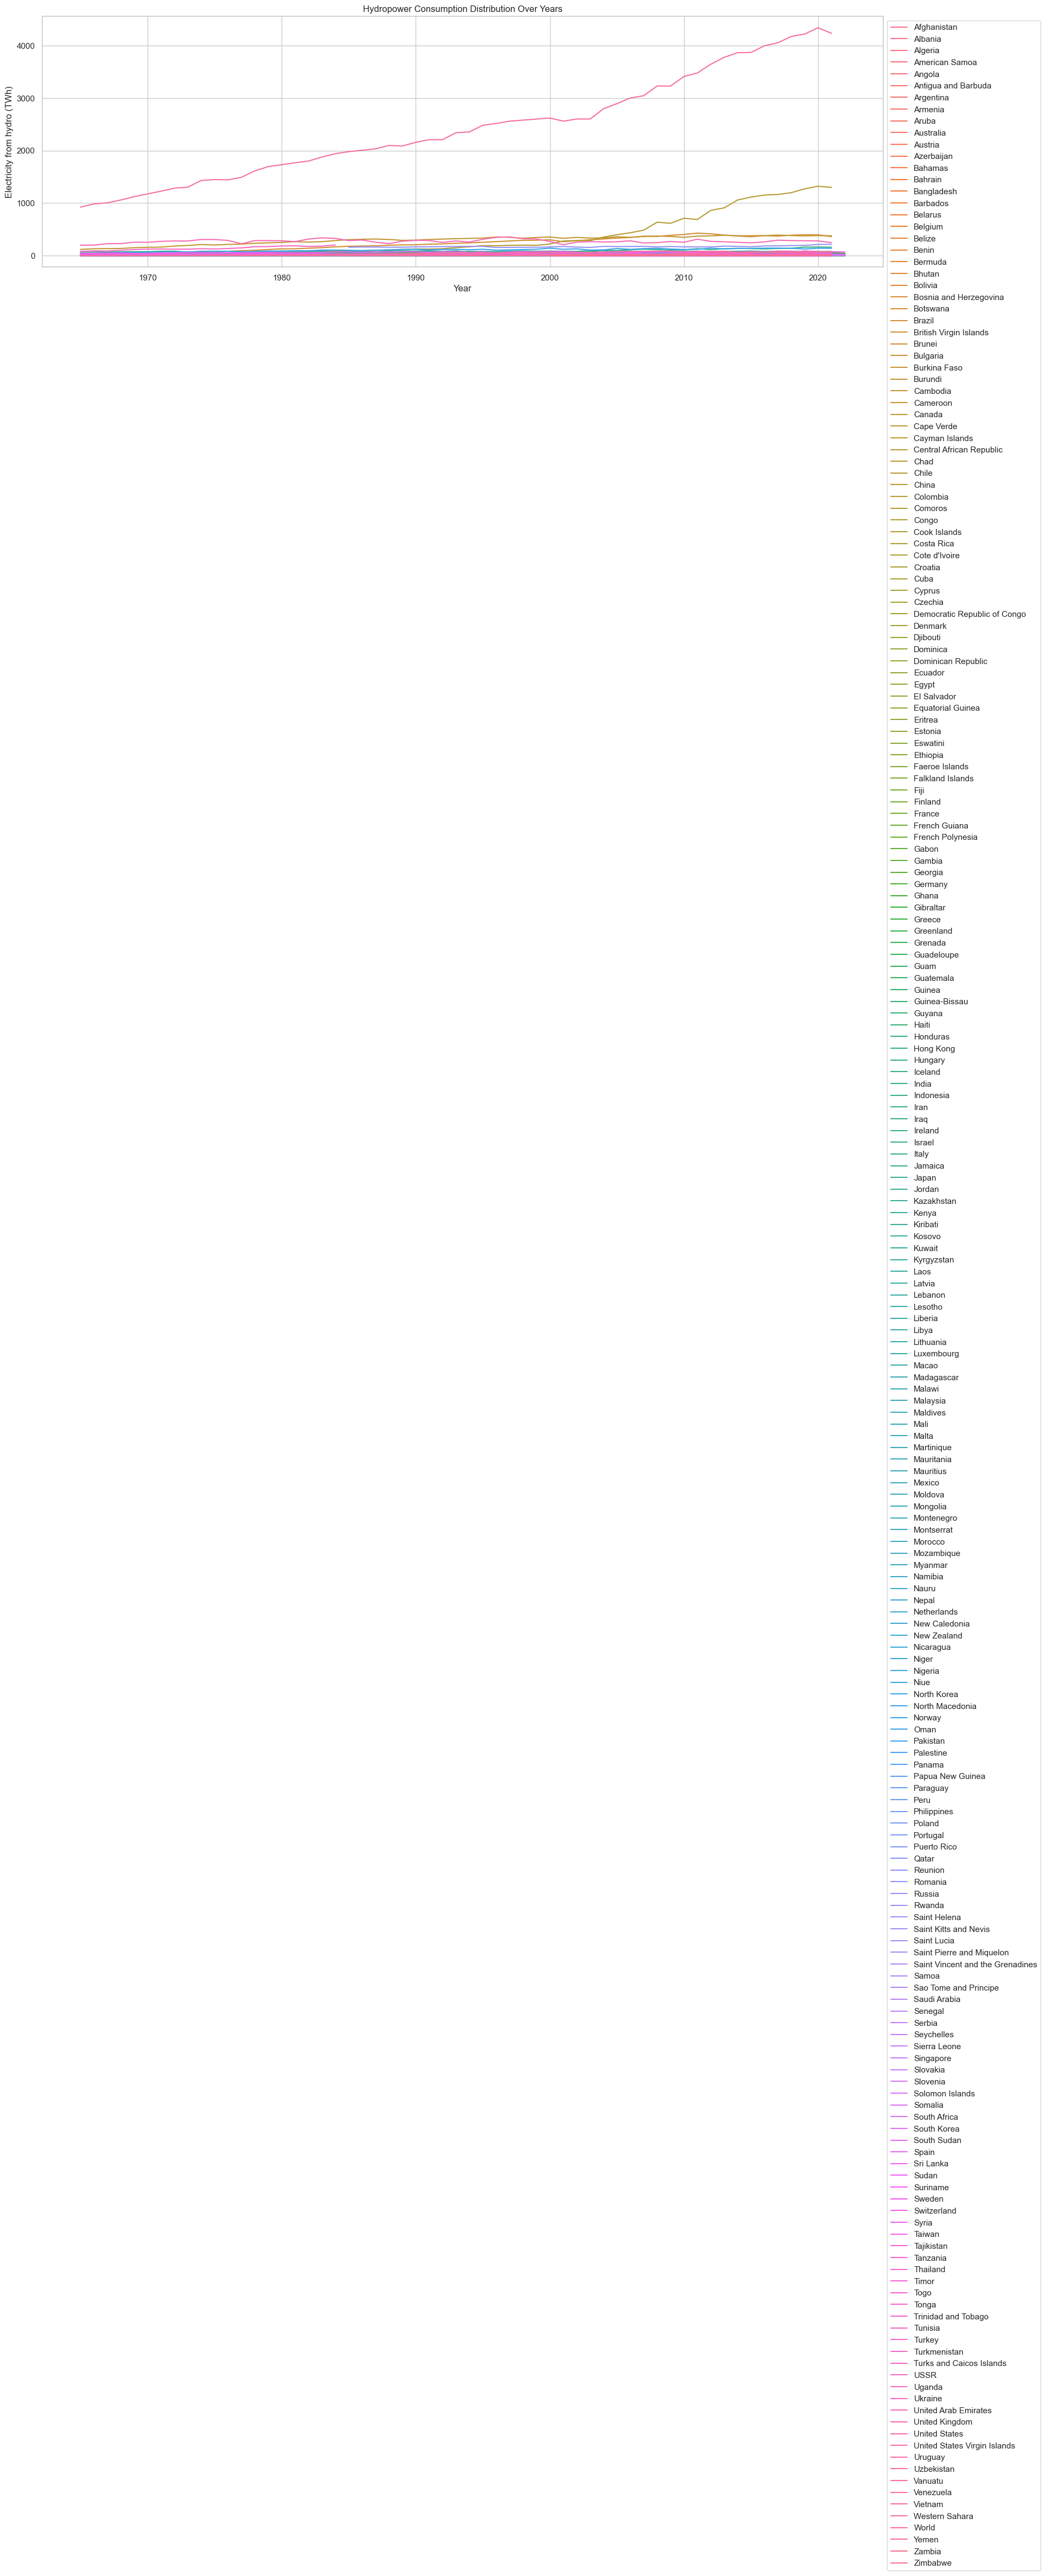

In [26]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year', y='Electricity from hydro (TWh)', data=hydropower_consumption, hue='Entity')
plt.title('Hydropower Consumption Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity from hydro (TWh)')
plt.legend(loc='upper left', bbox_to_anchor=(1, 1))
plt.show()


Ülke Karşılaştırmalı Analiz (Çubuk Grafiği):


In [27]:
fig = px.choropleth(
    data_frame=hydropower_consumption,
    locations='Code',  # Ülke kodları
    color='Electricity from hydro (TWh)',  # Renklendirilecek değer
    hover_name='Entity',  # Fare üzerine geldiğinde gösterilecek metin
    color_continuous_scale='Viridis',  # Renk skalası
    projection='natural earth'  # Harita projeksiyonu
)


In [28]:
fig.show()

Yıllara Göre Ortalama Tüketim (Çizgi Grafiği):



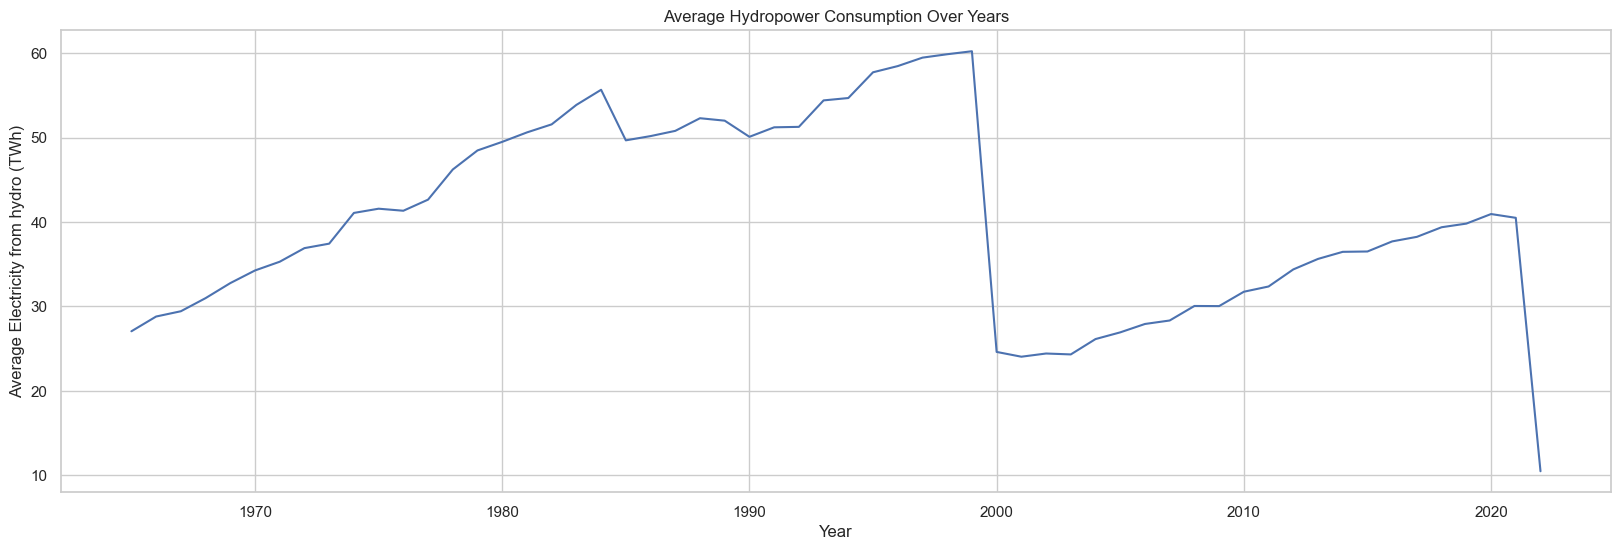

In [29]:
average_consumption_by_year = hydropower_consumption.groupby('Year')['Electricity from hydro (TWh)'].mean()
plt.figure(figsize=(20, 6))
average_consumption_by_year.plot(kind='line')
plt.title('Average Hydropower Consumption Over Years')
plt.xlabel('Year')
plt.ylabel('Average Electricity from hydro (TWh)')
plt.show()


Hydropower Tüketim Dağılımı (Histogram veya Yoğunluk Grafiği):


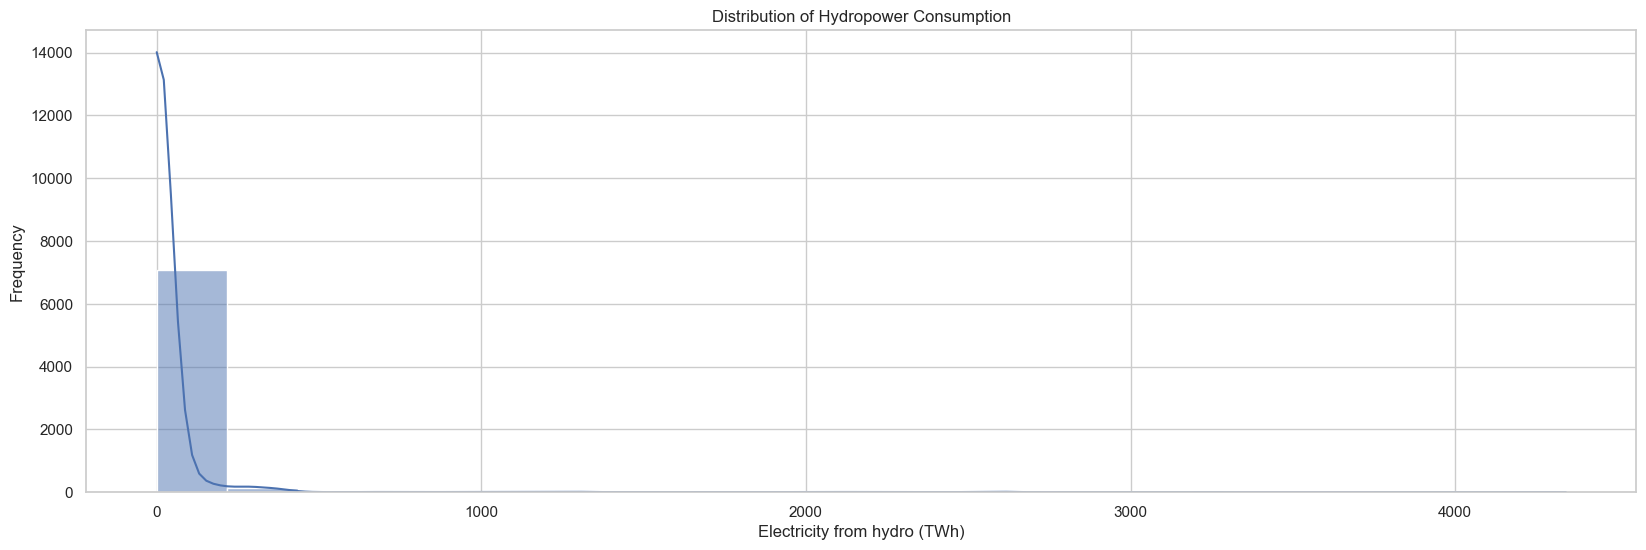

In [30]:
plt.figure(figsize=(20, 6))
sns.histplot(hydropower_consumption['Electricity from hydro (TWh)'], bins=20, kde=True)
plt.title('Distribution of Hydropower Consumption')
plt.xlabel('Electricity from hydro (TWh)')
plt.ylabel('Frequency')
plt.show()


Hidroelektrik Enerji Payının Zaman İçindeki Değişimi (Çizgi Grafiği):


In [31]:
print(hydro_share_energy.isnull().sum())

hydro_share_energy = hydro_share_energy.dropna()  


Entity                                 0
Code                                   0
Year                                   0
Hydro (% equivalent primary energy)    0
dtype: int64


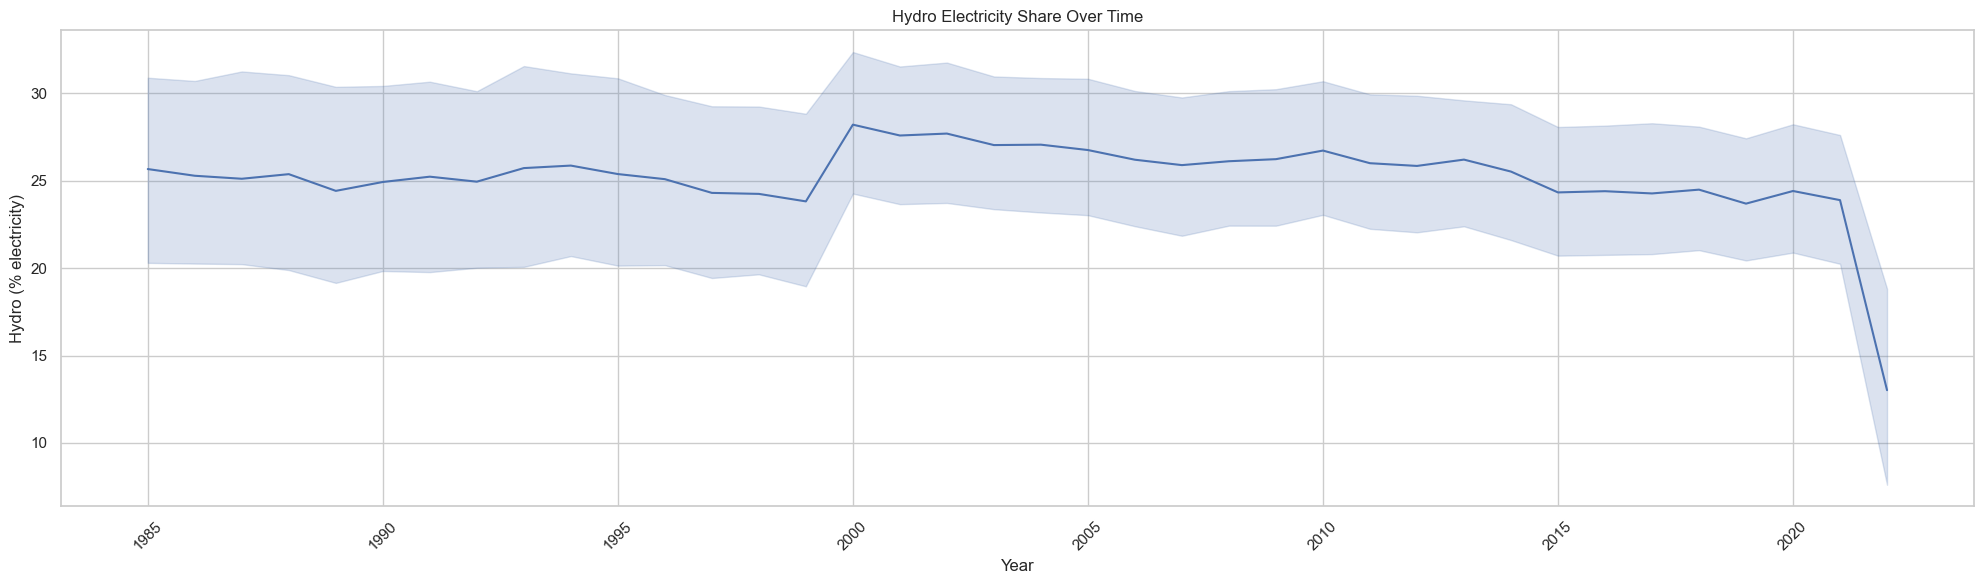

In [32]:
plt.figure(figsize=(20, 6))
sns.lineplot(x='Year', y='Hydro (% electricity)', data=share_electricity_hydro)
plt.title('Hydro Electricity Share Over Time')
plt.xlabel('Year')
plt.ylabel('Hydro (% electricity)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()

Hidroelektrik Enerji Payının Ülke Karşılaştırması (Çubuk Grafiği):


In [33]:
print(share_electricity_hydro.isnull().sum())

share_electricity_hydro = share_electricity_hydro.dropna()  

Entity                      0
Code                     1095
Year                        0
Hydro (% electricity)       0
dtype: int64


C:\Users\pnrde\AppData\Local\Temp\ipykernel_10172\4053232360.py:8: UserWarning:

Tight layout not applied. The bottom and top margins cannot be made large enough to accommodate all axes decorations.



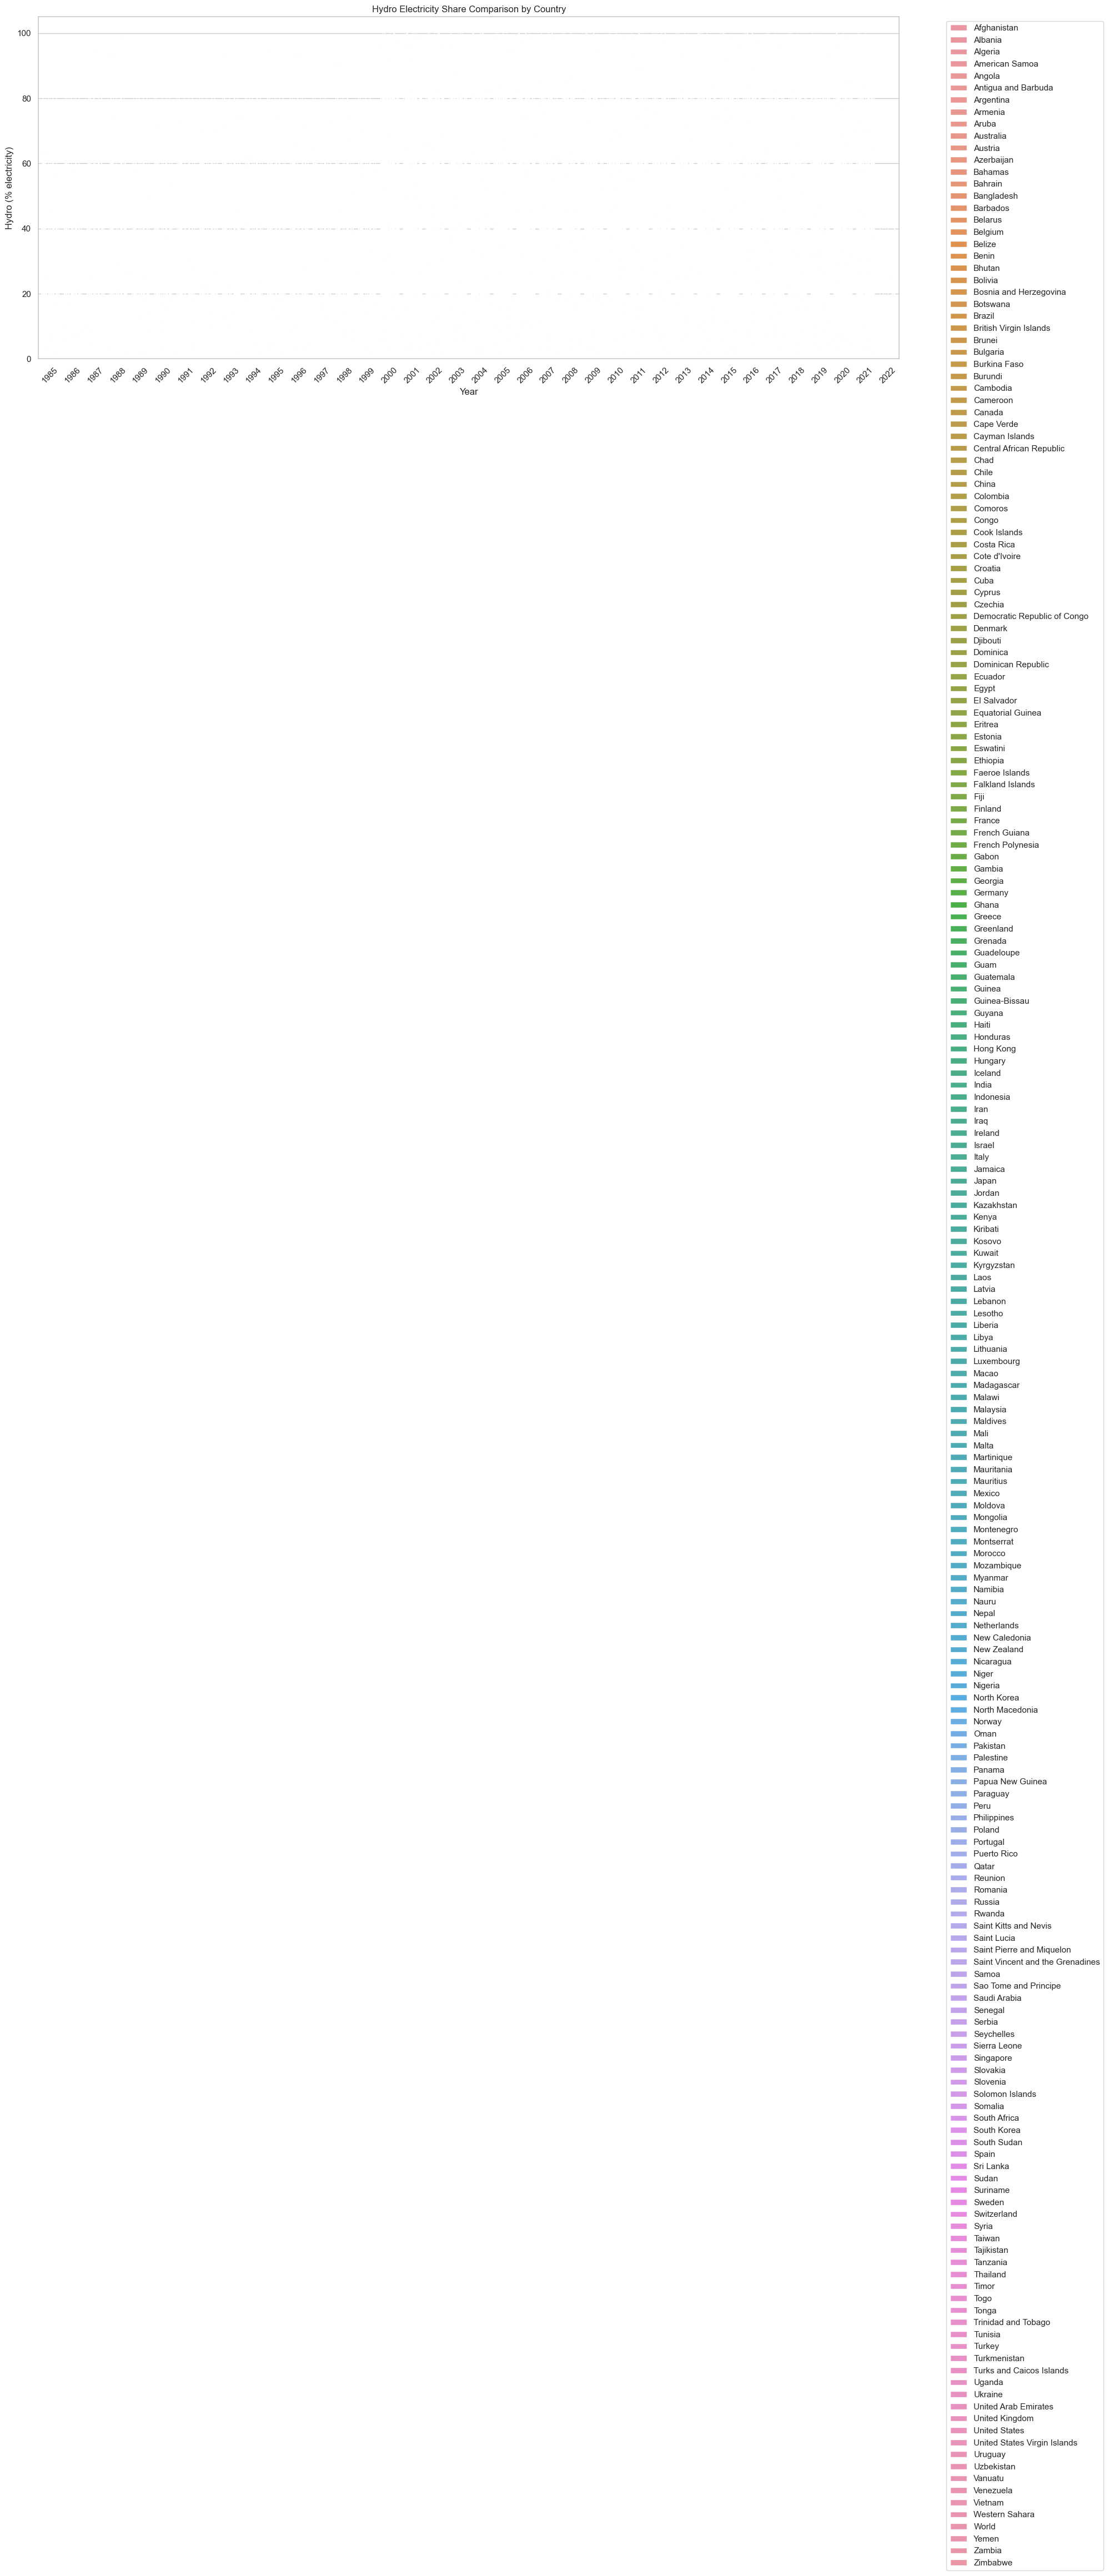

In [62]:
plt.figure(figsize=(20, 8))
sns.barplot(x='Year', y='Hydro (% electricity)', hue='Entity', data=share_electricity_hydro)
plt.title('Hydro Electricity Share Comparison by Country')
plt.xlabel('Year')
plt.ylabel('Hydro (% electricity)')
plt.xticks(rotation=45)
plt.legend(bbox_to_anchor=(1.05, 1), loc='upper left')
plt.tight_layout(rect=[0, 0, 0.0, 1.1])  # Alt ve üst kenar boşluklarını ayarlayarak düzenleme yapın
plt.show()


Hidroelektrik Enerji Payının Ortalama Dağılımı (Histogram):


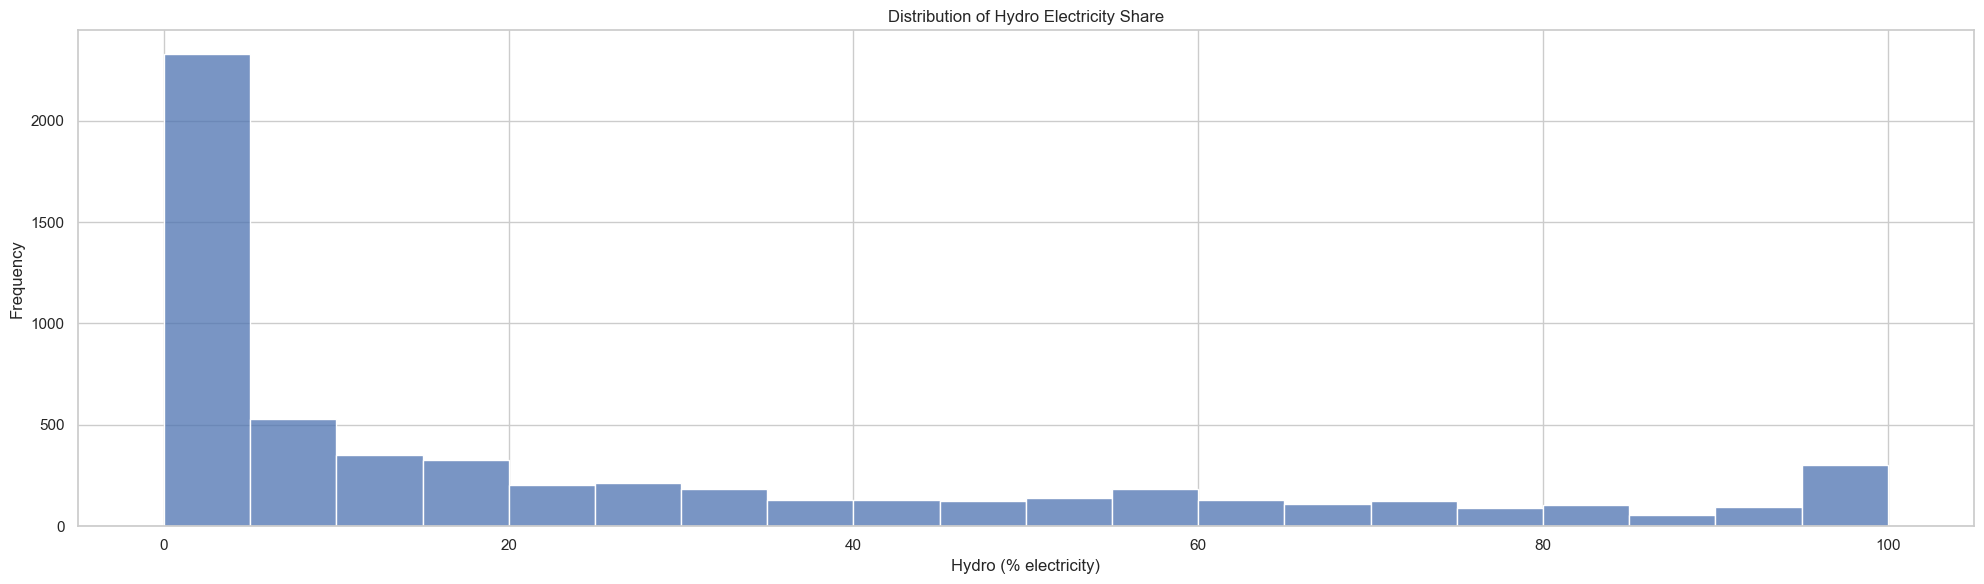

In [35]:
plt.figure(figsize=(20, 6))
sns.histplot(data=share_electricity_hydro, x='Hydro (% electricity)', bins=20)
plt.title('Distribution of Hydro Electricity Share')
plt.xlabel('Hydro (% electricity)')
plt.ylabel('Frequency')
plt.tight_layout()
plt.show()


En Yüksek Hidroelektrik Enerji Payına Sahip Ülkeler (Sıralı Çubuk Grafiği):


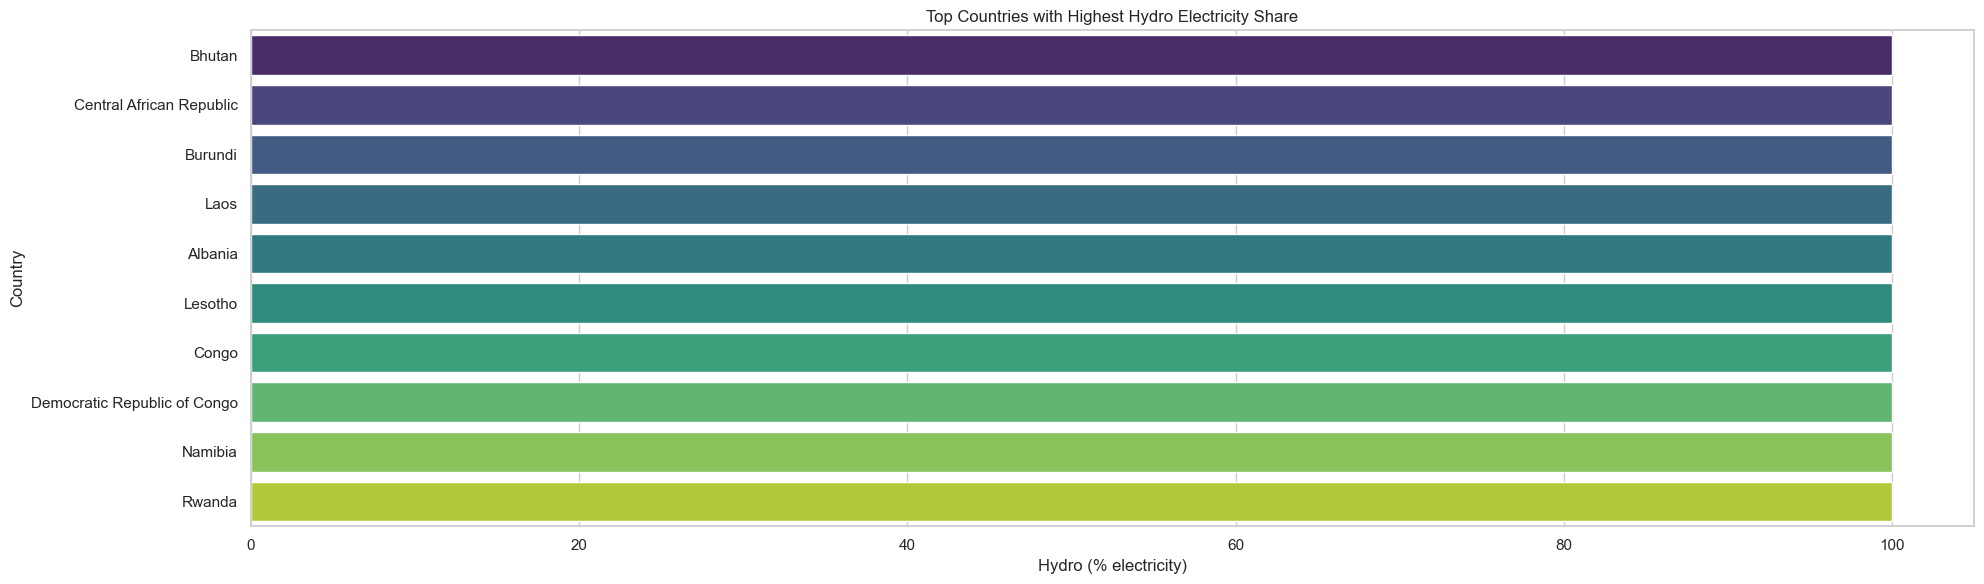

In [36]:
top_countries = share_electricity_hydro.groupby('Entity')['Hydro (% electricity)'].max().sort_values(ascending=False).head(10)
plt.figure(figsize=(20, 6))
sns.barplot(x=top_countries, y=top_countries.index, palette='viridis')
plt.title('Top Countries with Highest Hydro Electricity Share')
plt.xlabel('Hydro (% electricity)')
plt.ylabel('Country')
plt.tight_layout()
plt.show()


Hidroelektrik Enerji Payının Bölgesel Dağılımı (Pasta Grafiği):


In [37]:
region_share = share_electricity_hydro.groupby('Entity')['Hydro (% electricity)'].mean().reset_index()


In [38]:
fig = px.choropleth(region_share, 
                    locations='Entity', 
                    locationmode='country names', 
                    color='Hydro (% electricity)',
                    hover_name='Entity',
                    color_continuous_scale='Viridis',
                    title='Regional Distribution of Hydro Electricity Share',
                    template='plotly_dark')

In [39]:
fig.show()

Hidroelektrik Enerji Payının Yıllara Göre Dağılımı (Box Plot):


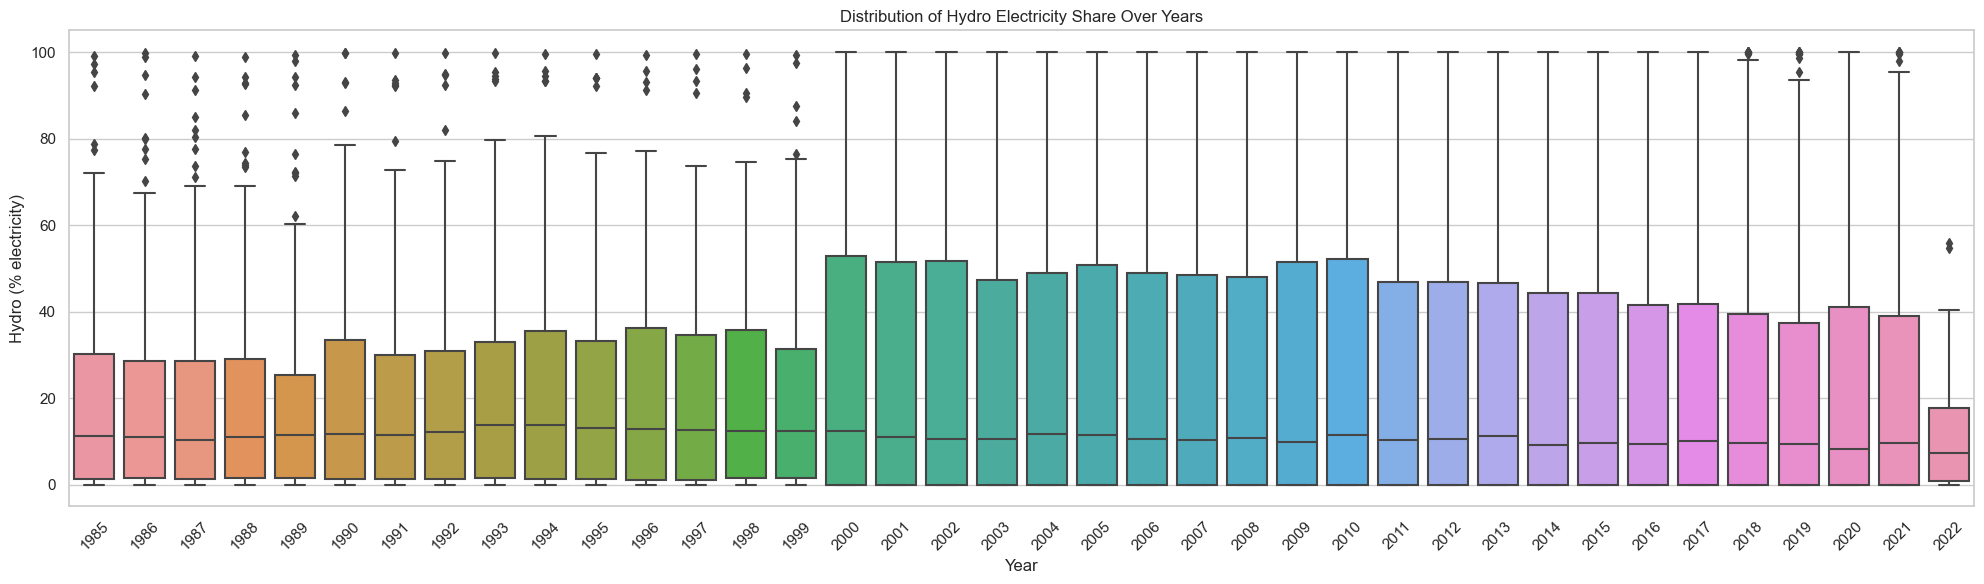

In [40]:
plt.figure(figsize=(20, 6))
sns.boxplot(x='Year', y='Hydro (% electricity)', data=share_electricity_hydro)
plt.title('Distribution of Hydro Electricity Share Over Years')
plt.xlabel('Year')
plt.ylabel('Hydro (% electricity)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Hidroelektrik Enerji Payının Zaman İçindeki Dağılımı (Swarm Plot):


C:\Users\pnrde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning:

16.9% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\pnrde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning:

18.2% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\pnrde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packages\seaborn\categorical.py:3544: UserWarning:

18.1% of the points cannot be placed; you may want to decrease the size of the markers or use stripplot.

C:\Users\pnrde\AppData\Local\Packages\PythonSoftwareFoundation.Python.3.11_qbz5n2kfra8p0\LocalCache\local-packages\Python311\site-packag

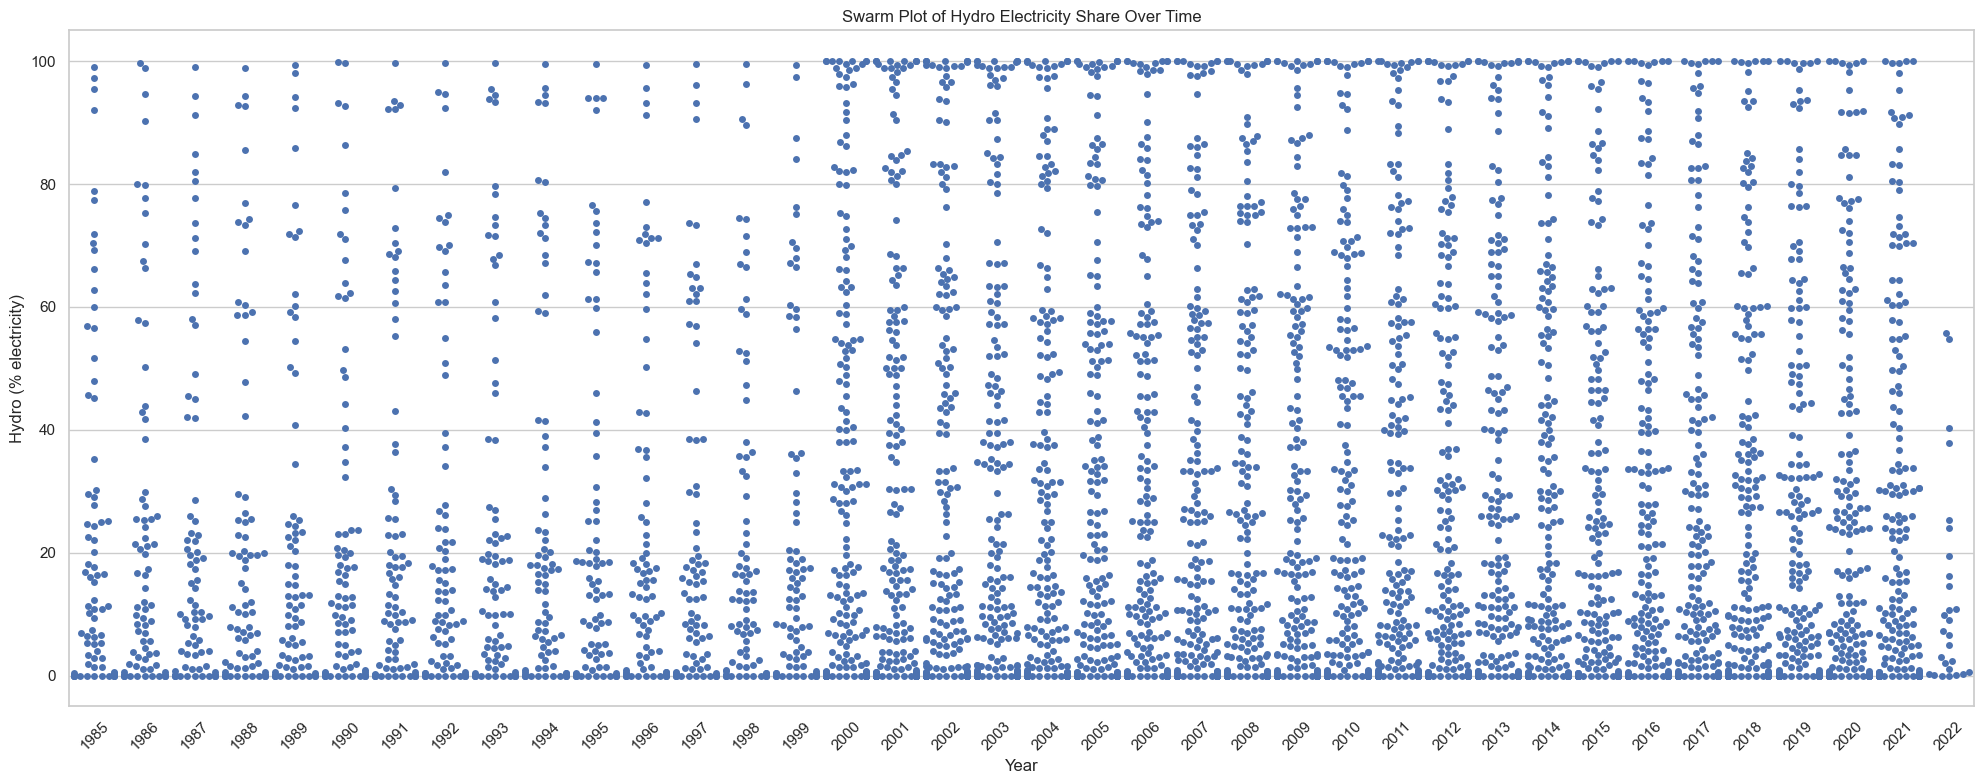

In [41]:
plt.figure(figsize=(20, 8))
sns.swarmplot(x='Year', y='Hydro (% electricity)', data=share_electricity_hydro)
plt.title('Swarm Plot of Hydro Electricity Share Over Time')
plt.xlabel('Year')
plt.ylabel('Hydro (% electricity)')
plt.xticks(rotation=45)
plt.tight_layout()
plt.show()


Rüzgar Enerjisi Üretiminin Zaman İçindeki Değişimi (Çizgi Grafiği):



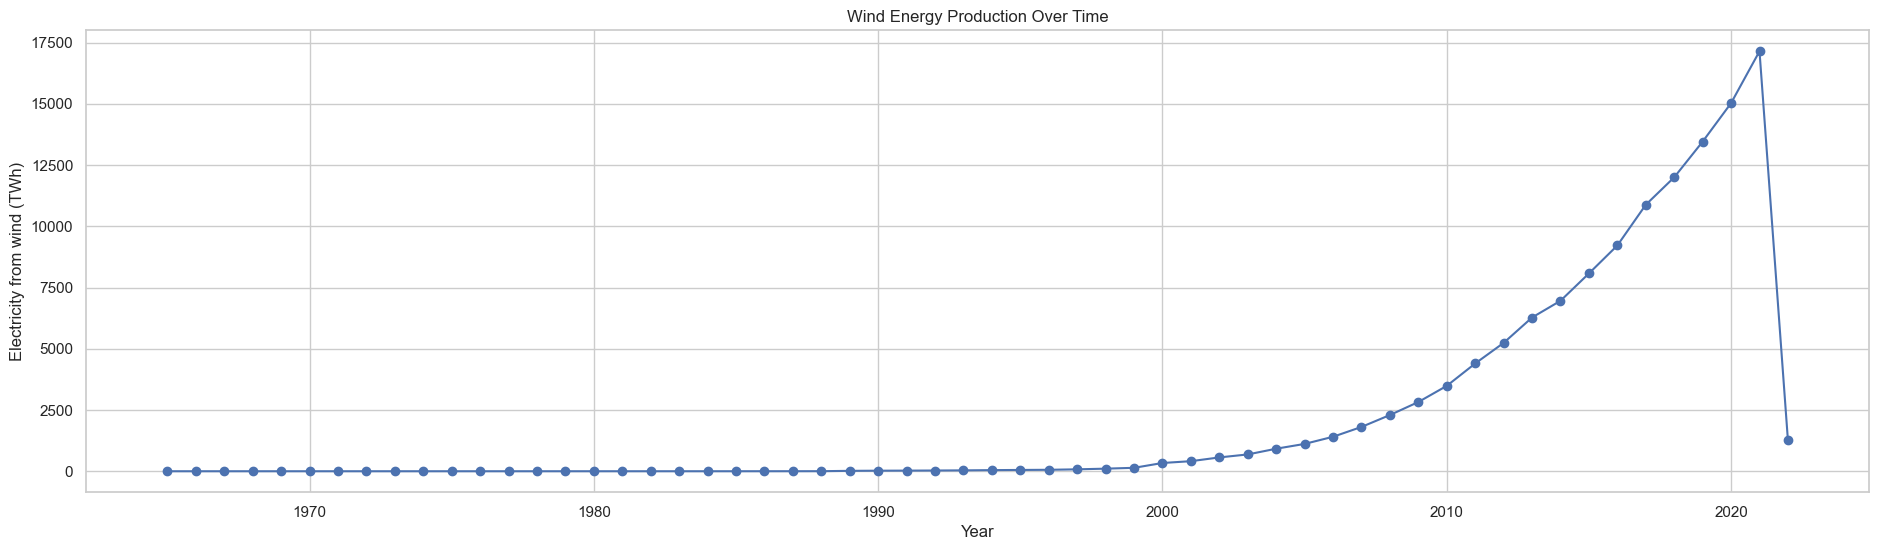

In [42]:
plt.figure(figsize=(23, 6))
wind_production_yearly = wind_generation.groupby('Year')['Electricity from wind (TWh)'].sum()
plt.plot(wind_production_yearly.index, wind_production_yearly.values, marker='o')
plt.title('Wind Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Electricity from wind (TWh)')
plt.grid(True)
plt.show()


Ülke Karşılaştırmalı Rüzgar Enerjisi Üretimi (Çubuk Grafiği):



In [43]:

print(wind_generation.isnull().sum())

wind_generation = wind_generation.dropna() 

Entity                            0
Code                           1459
Year                              0
Electricity from wind (TWh)       0
dtype: int64


In [44]:
Selected_year = 2020  # Örnek bir yıl seçimi
country_comparison = wind_generation[wind_generation['Year'] == 2022]

In [45]:
fig = px.bar(country_comparison, x='Entity', y='Electricity from wind (TWh)',
             title=f'Wind Energy Production Comparison in {2022}',
             labels={'Entity': 'Country', 'Electricity from wind (TWh)': 'Electricity (TWh)'})

fig.update_xaxes(tickangle=60)
fig.show()

Yıllara Göre Ortalama Rüzgar Enerjisi Üretimi (Hızlı Çizgi Grafiği):



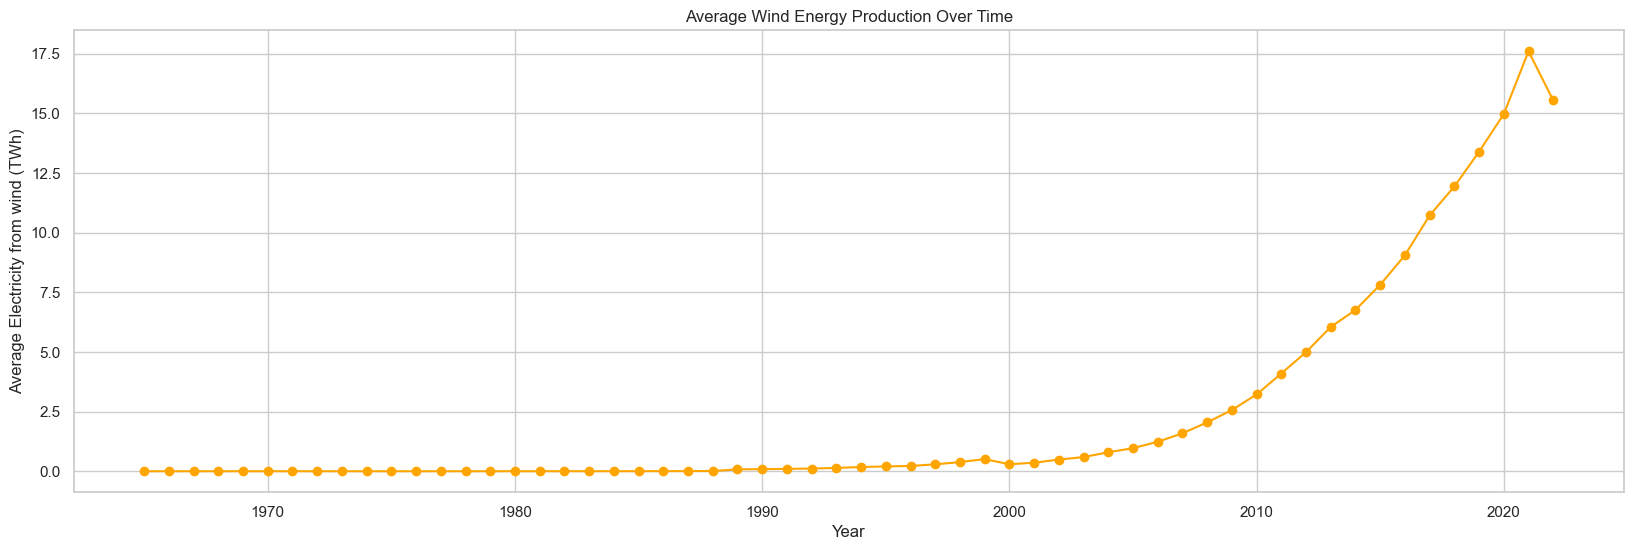

In [46]:
plt.figure(figsize=(20, 6))
wind_production_avg_yearly = wind_generation.groupby('Year')['Electricity from wind (TWh)'].mean()
plt.plot(wind_production_avg_yearly.index, wind_production_avg_yearly.values, marker='o', color='orange')
plt.title('Average Wind Energy Production Over Time')
plt.xlabel('Year')
plt.ylabel('Average Electricity from wind (TWh)')
plt.grid(True)
plt.show()


En Yüksek Rüzgar Enerjisi Üretimine Sahip Ülkeler (Sıralı Çubuk Grafiği):



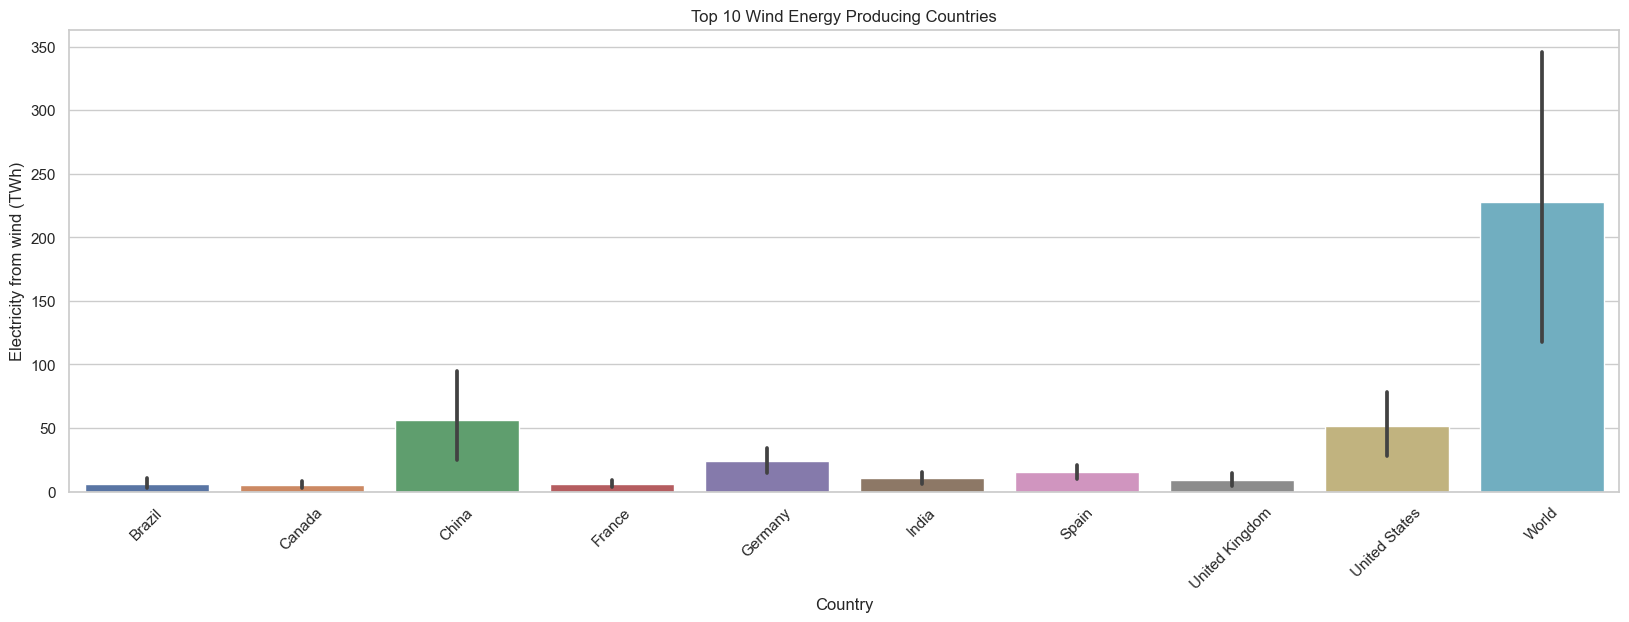

In [47]:
highest_countries = wind_generation.groupby('Entity')['Electricity from wind (TWh)'].sum().nlargest(10).index
highest_countries_data = wind_generation[wind_generation['Entity'].isin(highest_countries)]
plt.figure(figsize=(20, 6))
sns.barplot(x='Entity', y='Electricity from wind (TWh)', data=highest_countries_data)
plt.title('Top 10 Wind Energy Producing Countries')
plt.xlabel('Country')
plt.ylabel('Electricity from wind (TWh)')
plt.xticks(rotation=45)
plt.show()


Yıllara Göre Rüzgar Enerjisi Üretiminin Dağılımı (Box Plot):



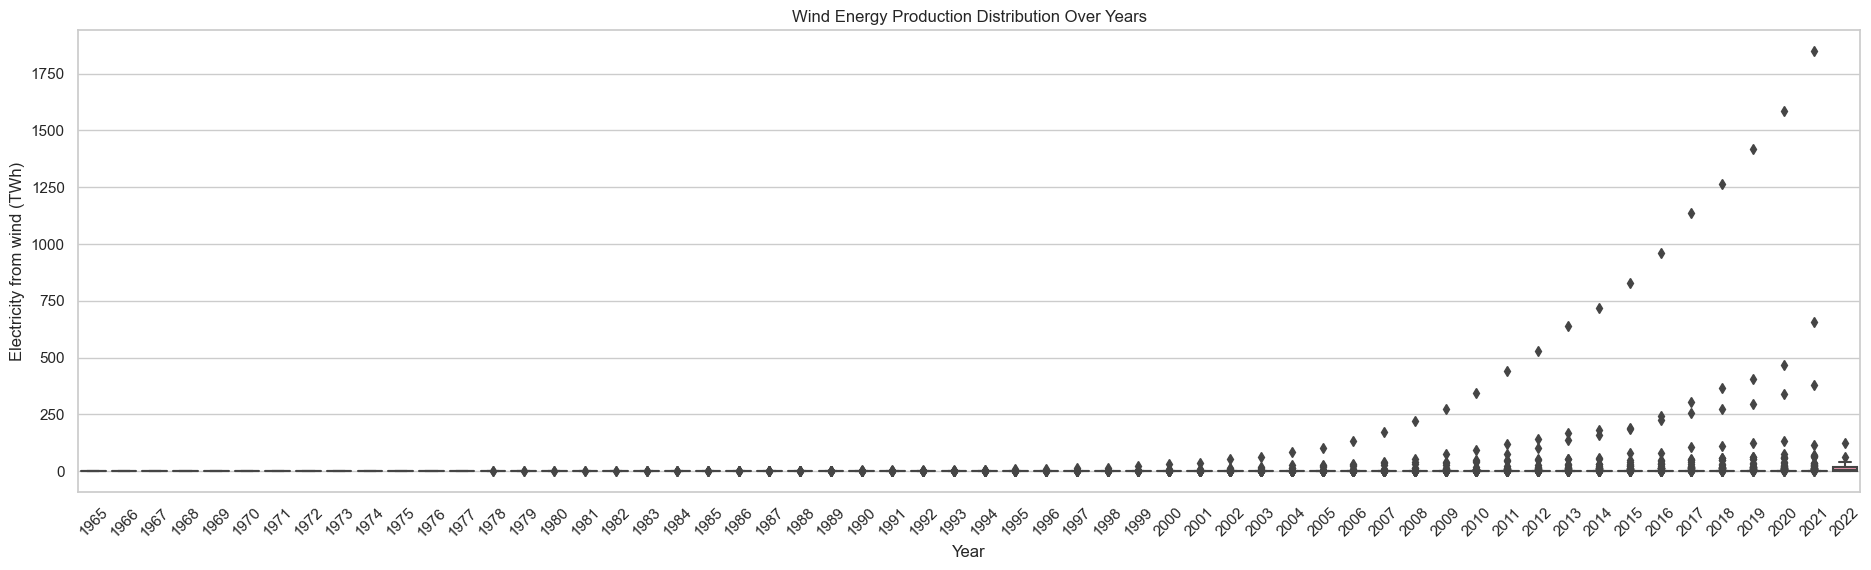

In [48]:
plt.figure(figsize=(23, 6))
sns.boxplot(x='Year', y='Electricity from wind (TWh)', data=wind_generation)
plt.title('Wind Energy Production Distribution Over Years')
plt.xlabel('Year')
plt.ylabel('Electricity from wind (TWh)')
plt.xticks(rotation=45)
plt.show()


Rüzgar Enerjisi Üretiminin Bölgesel Dağılımı (Harita):



In [49]:
fig = px.choropleth(wind_generation, 
                    locations='Code', 
                    color='Electricity from wind (TWh)',
                    hover_name='Entity', 
                    color_continuous_scale=px.colors.sequential.Plasma,
                    projection='mercator',  
                    title='Wind Energy Production by Country')
fig.update_geos(showcoastlines=True, coastlinecolor="Black", showland=True, landcolor="white")  
fig.update_layout(geo=dict(showframe=False, showcoastlines=False, projection_scale=20))

fig.show()

Toplam Kurulu Rüzgar Enerjisi Kapasitesinin Zaman İçindeki Değişimi (Çizgi Grafiği):



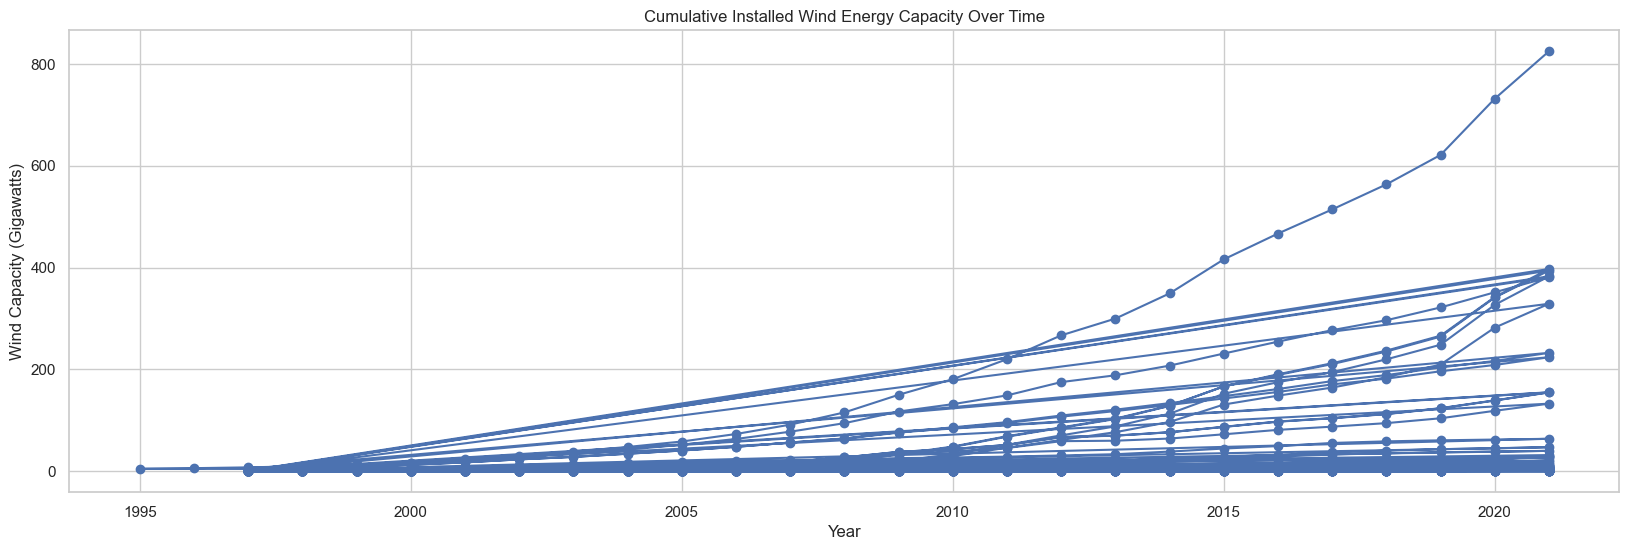

In [50]:
plt.figure(figsize=(20, 6))
plt.plot(cumulative_installed_wind_capacity['Year'], cumulative_installed_wind_capacity['Wind Capacity'], marker='o')
plt.title('Cumulative Installed Wind Energy Capacity Over Time')
plt.xlabel('Year')
plt.ylabel('Wind Capacity (Gigawatts)')
plt.grid(True)
plt.show()


Kurulu Rüzgar Enerjisi Kapasitesi Karşılaştırması (Çubuk Grafiği):

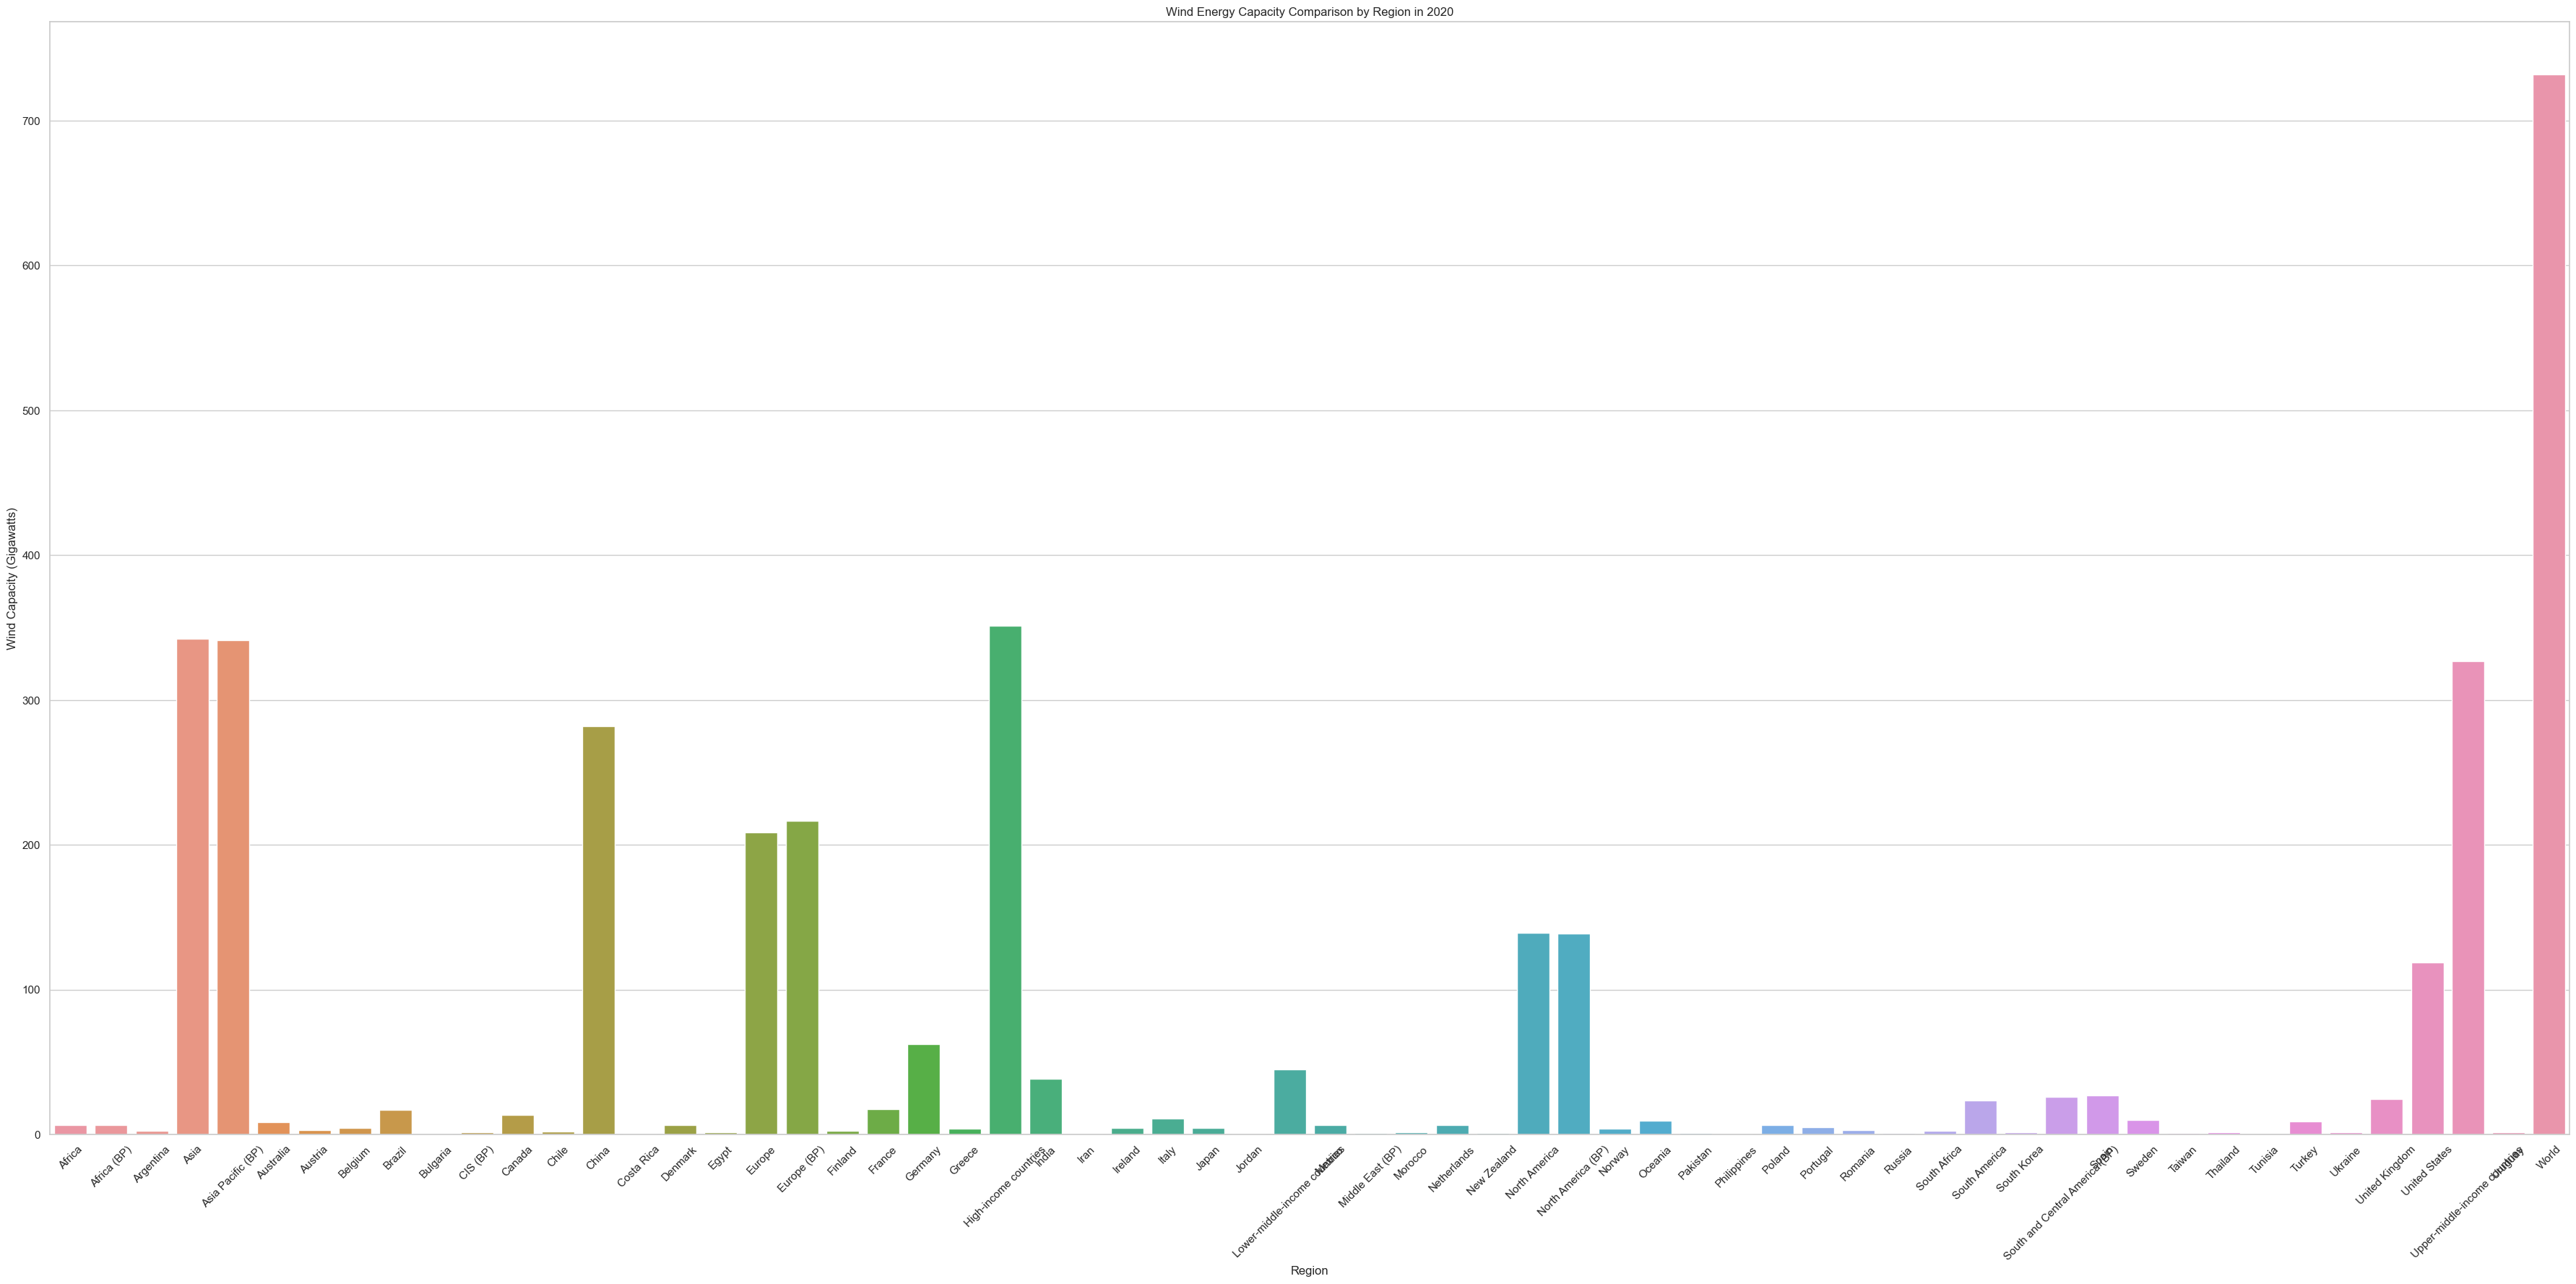

In [51]:
plt.figure(figsize=(45, 20))
year_comparison = cumulative_installed_wind_capacity[cumulative_installed_wind_capacity['Year'] == 2020]
sns.barplot(x='Entity', y='Wind Capacity', data=year_comparison)
plt.title('Wind Energy Capacity Comparison by Region in 2020')
plt.xlabel('Region')
plt.ylabel('Wind Capacity (Gigawatts)')
plt.xticks(rotation=45)
plt.show()


En Hızlı Büyüyen Rüzgar Enerjisi Kapasiteleri (Sıralı Çubuk Grafiği):

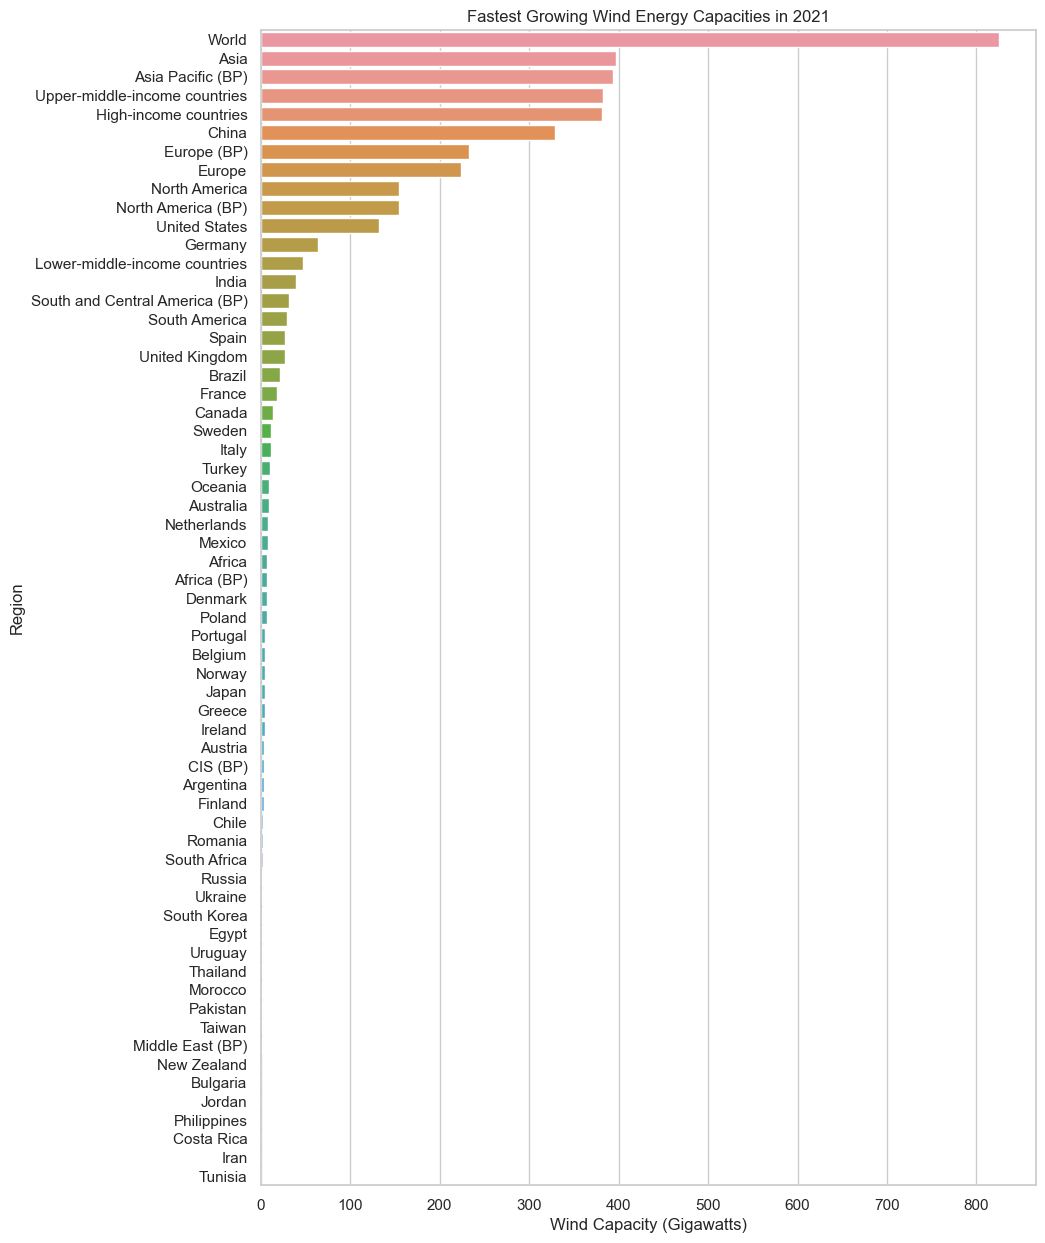

In [52]:
plt.figure(figsize=(10, 15))
latest_year = cumulative_installed_wind_capacity['Year'].max()
latest_data = cumulative_installed_wind_capacity[cumulative_installed_wind_capacity['Year'] == latest_year]
sorted_data = latest_data.sort_values(by='Wind Capacity', ascending=False)
sns.barplot(x='Wind Capacity', y='Entity', data=sorted_data)
plt.title(f'Fastest Growing Wind Energy Capacities in {latest_year}')
plt.xlabel('Wind Capacity (Gigawatts)')
plt.ylabel('Region')
plt.show()


 Kurulu Rüzgar Enerjisi Kapasitesinin Bölgelere Göre Dağılımı (Pasta Grafiği):

In [53]:
import plotly.express as px

long_data = cumulative_installed_wind_capacity.melt(id_vars=['Entity', 'Year'], value_vars=['Wind Capacity'], var_name='Capacity Type', value_name='Capacity (GW)')

fig = px.line(long_data, x='Year', y='Capacity (GW)', color='Entity', title='Cumulative Installed Wind Energy Capacity by Region',
              labels={'Year': 'Year', 'Capacity (GW)': 'Wind Capacity (GW)', 'Entity': 'Region'},
              line_shape='spline', render_mode='svg', template='plotly_dark')

fig.update_layout(
    legend_title_text='Region',
    xaxis=dict(tickmode='linear'), 
    xaxis_title='Year',
    yaxis_title='Wind Capacity (GW)',
    hovermode='x unified'  
)

fig.show()


 Zaman İçinde Rüzgar Enerjisi Kapasitesinin Kümülatif Dağılımı (Alan Grafiği):

<Figure size 1200x600 with 0 Axes>

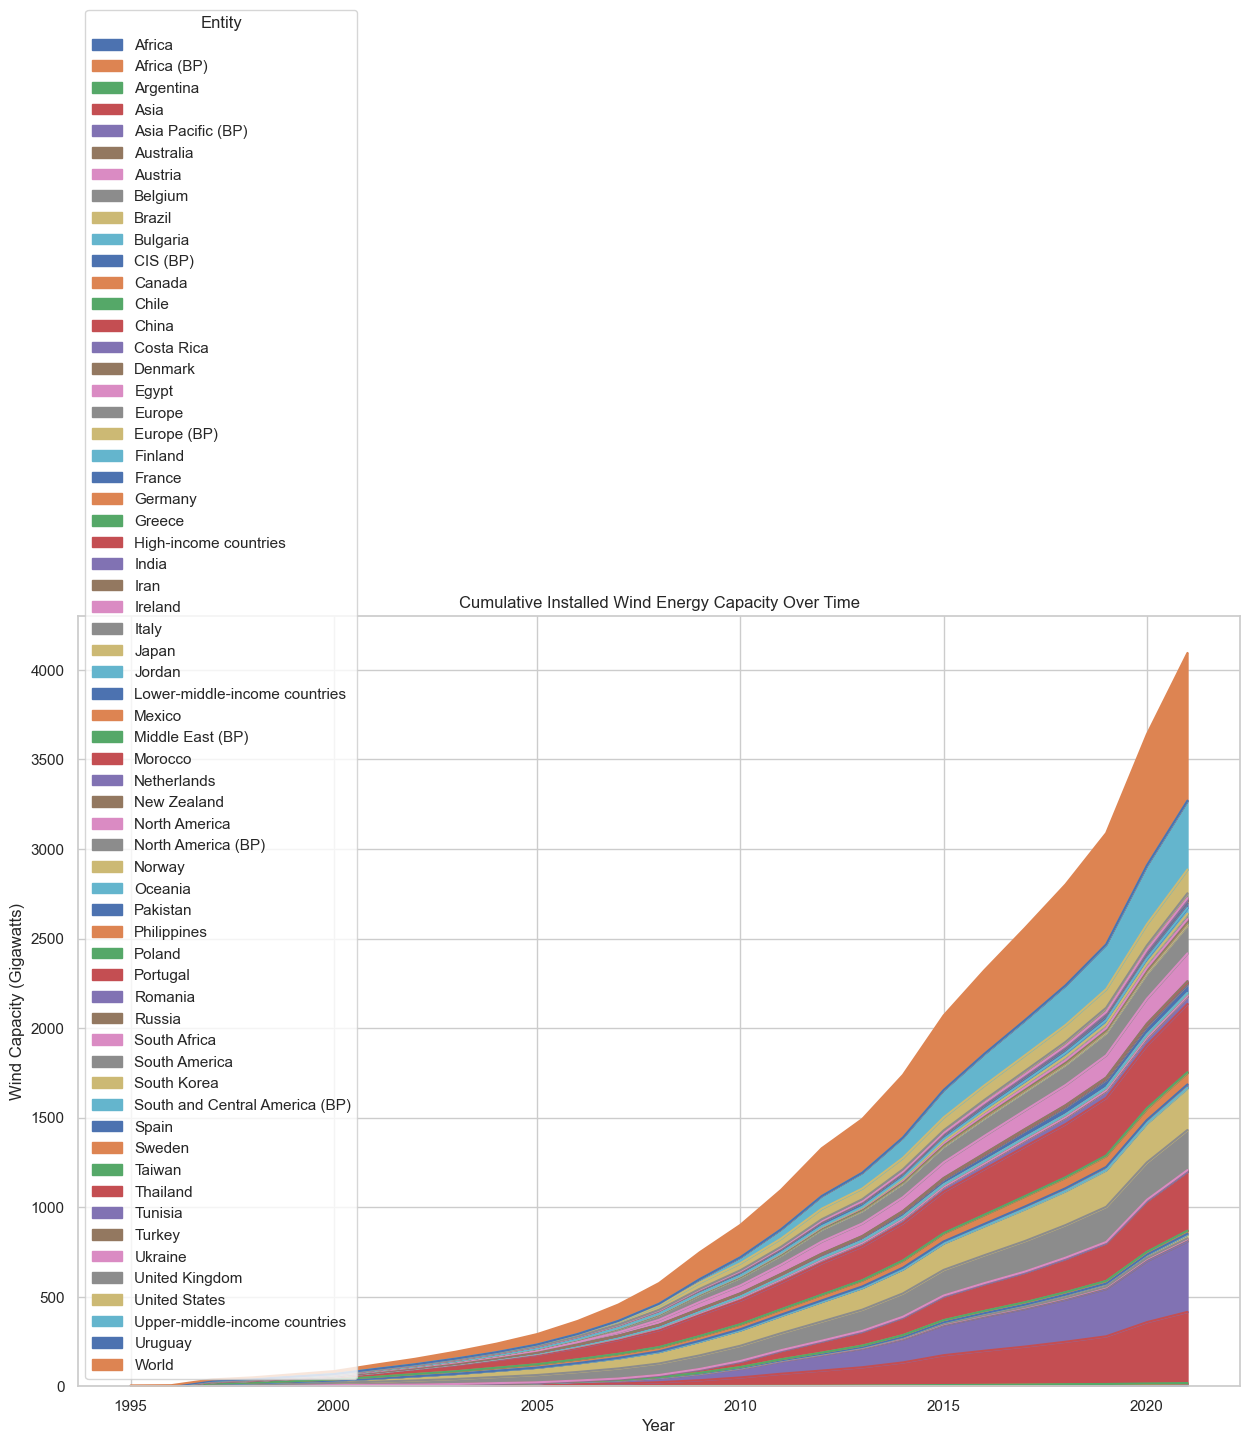

In [54]:
plt.figure(figsize=(12, 6))
cumulative_data = cumulative_installed_wind_capacity.pivot_table(index='Year', columns='Entity', values='Wind Capacity', aggfunc='sum')
cumulative_data.plot.area(stacked=True, figsize=(15, 10))
plt.title('Cumulative Installed Wind Energy Capacity Over Time')
plt.xlabel('Year')
plt.ylabel('Wind Capacity (Gigawatts)')
plt.show()


Yıllara Göre Rüzgar Enerjisinin Enerji Payı (Çizgi Grafiği) - Plotly:


In [55]:

print(wind_share_energy.isnull().sum())

wind_share_energy = wind_share_energy.dropna() 

Entity                                   0
Code                                  1215
Year                                     0
Wind (% equivalent primary energy)       0
dtype: int64


In [56]:
fig1 = px.line(wind_share_energy, x='Year', y='Wind (% equivalent primary energy)', title='Wind Energy Share Over Years')
fig1.update_xaxes(title='Year')
fig1.update_yaxes(title='Wind Energy Share (%)')
fig1.show()

Ülkelerin Rüzgar Enerjisi Kullanımı Karşılaştırması (Sıralı Çubuk Grafiği) - Plotly:

In [57]:
fig2 = px.bar(wind_share_energy, x='Entity', y='Wind (% equivalent primary energy)', title='Wind Energy Share by Country')
fig2.update_xaxes(title='Country')
fig2.update_yaxes(title='Wind Energy Share (%)')
fig2.show()


Yıllara Göre Rüzgar Enerjisinin Enerji Payının Dağılımı (Kutu Grafiği) - Plotly:

In [58]:
fig3 = px.box(wind_share_energy, x='Year', y='Wind (% equivalent primary energy)', title='Distribution of Wind Energy Share Over Years')
fig3.update_xaxes(title='Year')
fig3.update_yaxes(title='Wind Energy Share (%)')
fig3.show()


Yıllara Göre Rüzgar Enerjisinin Artış Oranı ve Rüzgar Enerjisi Kullanımının Zaman İçindeki Değişimi (Çizgi Grafiği) - Plotly:

In [59]:
fig_capacity = px.line(cumulative_installed_wind_capacity, x='Year', y='Wind Capacity', title='Wind Energy Capacity Over Years')
fig_capacity.update_xaxes(title='Year')
fig_capacity.update_yaxes(title='Wind Energy Capacity (GW)')

fig_share = px.line(wind_share_energy, x='Year', y='Wind (% equivalent primary energy)', title='Wind Energy Share Over Years')
fig_share.update_xaxes(title='Year')
fig_share.update_yaxes(title='Wind Energy Share (%)')

fig_capacity.update_layout(updatemenus=[{
    'active': 0,
    'buttons': [
        {'label': 'Capacity', 'method': 'update', 'args': [{'visible': [True, False]}]},
        {'label': 'Share', 'method': 'update', 'args': [{'visible': [False, True]}]}
    ]
}])

fig_capacity.add_traces(fig_share.data)

for i, trace in enumerate(fig_capacity.data):
    trace.visible = (i == 0)

fig_capacity.show()

Rüzgar Enerjisi Kullanımının Zaman İçindeki Değişimi (Çizgi Grafiği) - Bokeh:

In [60]:
from bokeh.plotting import figure, output_notebook, show
from bokeh.models import ColumnDataSource

output_notebook()

source = ColumnDataSource(wind_share_energy)

p = figure(title='Wind Energy Share Over Years', x_axis_label='Year', y_axis_label='Wind Energy Share (%)')
p.line('Year', 'Wind (% equivalent primary energy)', source=source, line_width=2, line_color='blue')

show(p)


Loading BokehJS ...

Ülkelere Göre Rüzgar Enerjisi Paylarının Karşılaştırılması

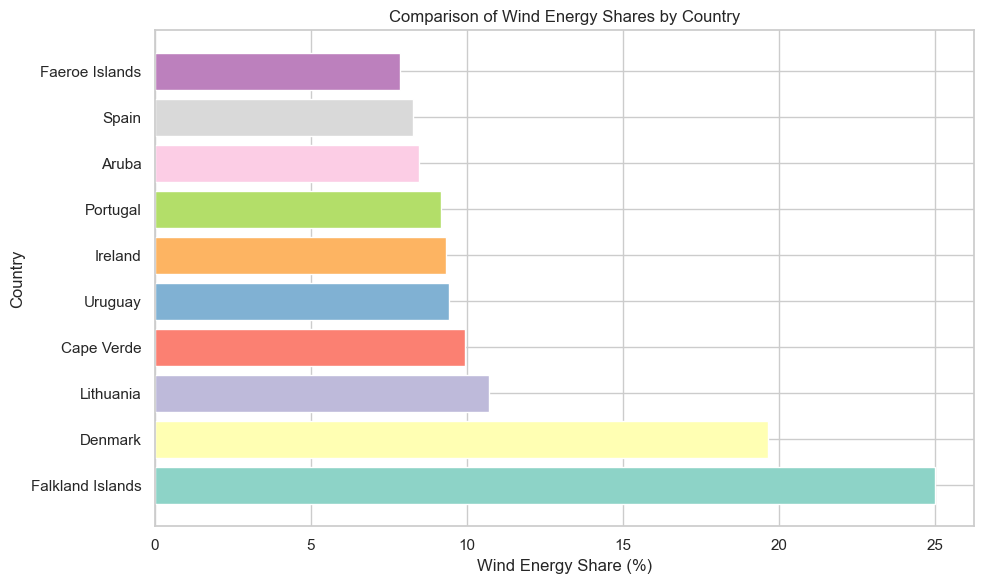

In [61]:
top_countries = share_electricity_wind.groupby('Entity')['Wind (% electricity)'].mean().sort_values(ascending=False).head(10)

# Görselleştirme yapma
plt.figure(figsize=(10, 6))
colors = sns.color_palette('Set3', len(top_countries))
plt.barh(top_countries.index, top_countries, color=colors)
plt.xlabel('Wind Energy Share (%)')
plt.ylabel('Country')
plt.title('Comparison of Wind Energy Shares by Country')
plt.tight_layout()
plt.show()